In [3]:
import pandas as pd
import data_describe as dd

The dataset in this example is on pump sensors that have had 7 pump failures in the last year.

In [4]:
df = pd.read_csv("gs://amazing-public-data/broken_pump_sensor/sensor.csv", index_col=0)

We can see that there are 51 sensors, a timestamp for each reading, and machine status.

In [4]:
df.head()

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2  2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3  2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4  2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889          NORMAL  
1   201.3889          NORMAL  
2   203.7037          NORMAL  
3   203.1250          NORMAL  
4   201.3889          NORMAL  

[5 rows x 54 columns]

The feature "machine_status" is categorical, and it describes if a pump is broken, recovering, or normal at a given time. This is valuable information that could potentially explain why anomolous behaviors are occurring in the sensor readings.
In order to use this information in an exploratory data analysis, we will numerically encode the three machine statuses below.

In [5]:
df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [5]:
machine_status = {'NORMAL':0, 'BROKEN':1, 'RECOVERING':2}
df['machine_status_enc'] = df['machine_status'].map(lambda x: machine_status[x])

In [7]:
df['machine_status_enc'].value_counts()

0    205836
2     14477
1         7
Name: machine_status_enc, dtype: int64

Where the darkest red squares are, we can see that machine status has a high correlation with sensor_00, sensor_02, and a few more.

<AxesSubplot:title={'center':'Correlation Matrix'}>

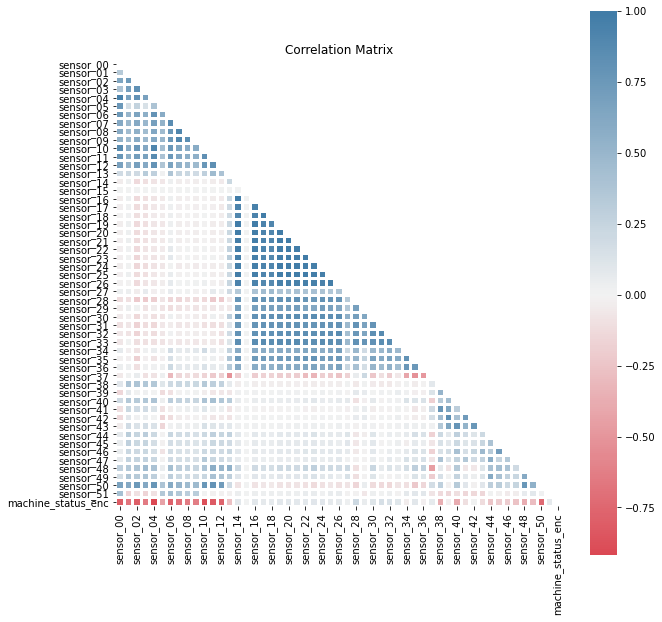

In [8]:
dd.correlation_matrix(df)

We can view the summary statistics to gain an overview. The mean and standard deviation are going to be particularly helpful in discovering outliers and anomalies. 

In [9]:
df.describe()

sensor_00      sensor_01      sensor_02      sensor_03  \
count  210112.000000  219951.000000  220301.000000  220301.000000   
mean        2.372221      47.591611      50.867392      43.752481   
std         0.412227       3.296666       3.666820       2.418887   
min         0.000000       0.000000      33.159720      31.640620   
25%         2.438831      46.310760      50.390620      42.838539   
50%         2.456539      48.133678      51.649300      44.227428   
75%         2.499826      49.479160      52.777770      45.312500   
max         2.549016      56.727430      56.032990      48.220490   

           sensor_04      sensor_05      sensor_06      sensor_07  \
count  220301.000000  220301.000000  215522.000000  214869.000000   
mean      590.673936      73.396414      13.501537      15.843152   
std       144.023912      17.298247       2.163736       2.201155   
min         2.798032       0.000000       0.014468       0.000000   
25%       626.620400      69.976260      13.346350      15.907120   
50%       632.638916      75.576790      13.642940      16.167530   
75%       637.615723      80.912150      14.539930      16.427950   
max       800.000000      99.999880      22.251160      23.596640   

           sensor_08      sensor_09  ...      sensor_43      sensor_44  \
count  215213.000000  215725.000000  ...  220293.000000  220293.000000   
mean       15.200721      14.799210  ...      43.879591      42.656877   
std         2.037390       2.091963  ...      11.044404      11.576355   
min         0.028935       0.000000  ...      24.479166      25.752316   
25%        15.183740      15.053530  ...      39.583330      36.747684   
50%        15.494790      15.082470  ...      42.968750      40.509260   
75%        15.697340      15.118630  ...      46.614580      45.138890   
max        24.348960      25.000000  ...     408.593700    1000.000000   

           sensor_45      sensor_46      sensor_47      sensor_48  \
count  220293.000000  220293.000000  220293.000000  220293.000000   
mean       43.094984      48.018585      44.340903     150.889044   
std        12.837520      15.641284      10.442437      82.244957   
min        26.331018      26.331018      27.199070      26.331018   
25%        36.747684      40.509258      39.062500      83.912030   
50%        40.219910      44.849540      42.534720     138.020800   
75%        44.849540      51.215280      46.585650     208.333300   
max       320.312500     370.370400     303.530100     561.632000   

           sensor_49      sensor_50      sensor_51  machine_status_enc  
count  220293.000000  143303.000000  204937.000000        220320.00000  
mean       57.119968     183.049260     202.699667             0.13145  
std        19.143598      65.258650     109.588607             0.49557  
min        26.620370      27.488426      27.777779             0.00000  
25%        47.743060     167.534700     179.108800             0.00000  
50%        52.662040     193.865700     197.338000             0.00000  
75%        60.763890     219.907400     216.724500             0.00000  
max       464.409700    1000.000000    1000.000000             2.00000  

[8 rows x 53 columns]

Look closely at the sensors which are correlated with machine_status. When they are appearing dark blue/black, their value is more than 2 standard deviations from the mean, which is associated with anomolous behvaior. This is happening right about the same time that 'machine_status' is yellow or 'RECOVERING'.

/opt/anaconda3/envs/test-env/lib/python3.7/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning:

invalid value encountered in true_divide

/opt/anaconda3/envs/test-env/lib/python3.7/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning:

Degrees of freedom <= 0 for slice.



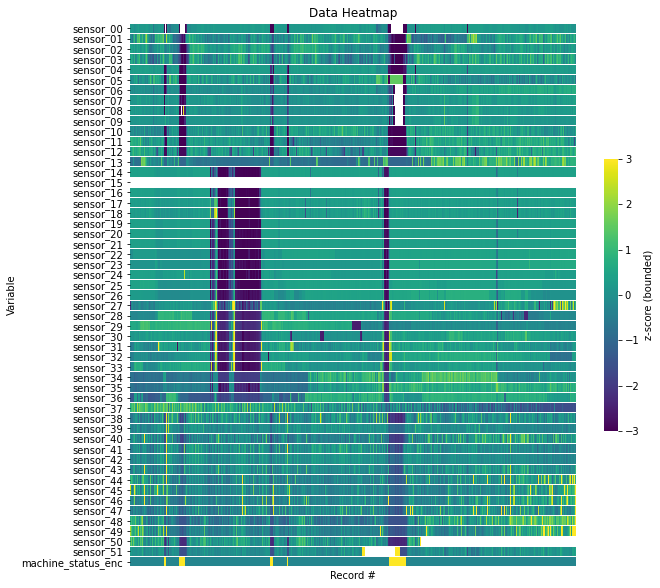

Heatmap Widget showing standardized values.

In [10]:
dd.data_heatmap(df)

Before working with the data, we want to check for any null values and deal with them right away.

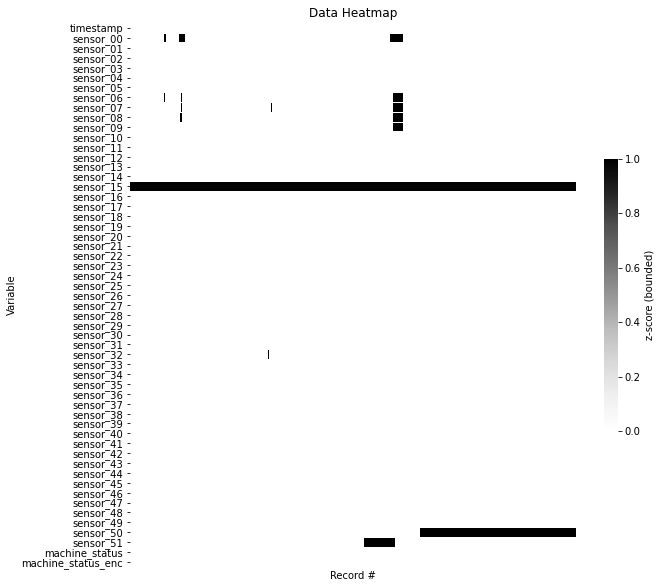

Heatmap Widget showing missing values.

In [11]:
dd.data_heatmap(df, missing=True)

Since sensor_15 is all null values, we will drop it from the dataframe. Let's see which other columns have null values.

In [6]:
df.drop(columns=['sensor_15'], inplace=True)

In [13]:
df.isnull().sum()

timestamp                 0
sensor_00             10208
sensor_01               369
sensor_02                19
sensor_03                19
sensor_04                19
sensor_05                19
sensor_06              4798
sensor_07              5451
sensor_08              5107
sensor_09              4595
sensor_10                19
sensor_11                19
sensor_12                19
sensor_13                19
sensor_14                21
sensor_16                31
sensor_17                46
sensor_18                46
sensor_19                16
sensor_20                16
sensor_21                16
sensor_22                41
sensor_23                16
sensor_24                16
sensor_25                36
sensor_26                20
sensor_27                16
sensor_28                16
sensor_29                72
sensor_30               261
sensor_31                16
sensor_32                68
sensor_33                16
sensor_34                16
sensor_35           

Since we are working with time series data, imputation can be tricky. If the mean is used, that can shrink the confidence interval in a forecasting, and throw off the local trends and seasonality. For now, we will propogate the last valid observation forward to fill the null.

In [7]:
df.fillna(method='ffill', inplace=True)

In [15]:
df.isnull().sum()

timestamp             0
sensor_00             0
sensor_01             0
sensor_02             0
sensor_03             0
sensor_04             0
sensor_05             0
sensor_06             0
sensor_07             0
sensor_08             0
sensor_09             0
sensor_10             0
sensor_11             0
sensor_12             0
sensor_13             0
sensor_14             0
sensor_16             0
sensor_17             0
sensor_18             0
sensor_19             0
sensor_20             0
sensor_21             0
sensor_22             0
sensor_23             0
sensor_24             0
sensor_25             0
sensor_26             0
sensor_27             0
sensor_28             0
sensor_29             0
sensor_30             0
sensor_31             0
sensor_32             0
sensor_33             0
sensor_34             0
sensor_35             0
sensor_36             0
sensor_37             0
sensor_38             0
sensor_39             0
sensor_40             0
sensor_41       

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

Plot time series for each sensor with BROKEN state marked with X in red color.

In [17]:
df['timestamp']

0        2018-04-01 00:00:00
1        2018-04-01 00:01:00
2        2018-04-01 00:02:00
3        2018-04-01 00:03:00
4        2018-04-01 00:04:00
                 ...        
220315   2018-08-31 23:55:00
220316   2018-08-31 23:56:00
220317   2018-08-31 23:57:00
220318   2018-08-31 23:58:00
220319   2018-08-31 23:59:00
Name: timestamp, Length: 220320, dtype: datetime64[ns]

In [30]:
import matplotlib.pyplot as plt

In [19]:
broken = df[df['machine_status']=='BROKEN']
names=df.columns

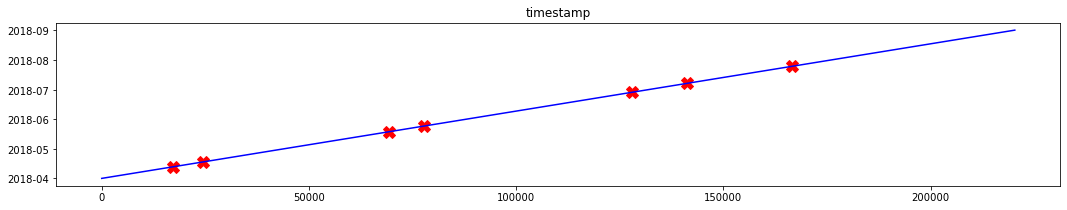

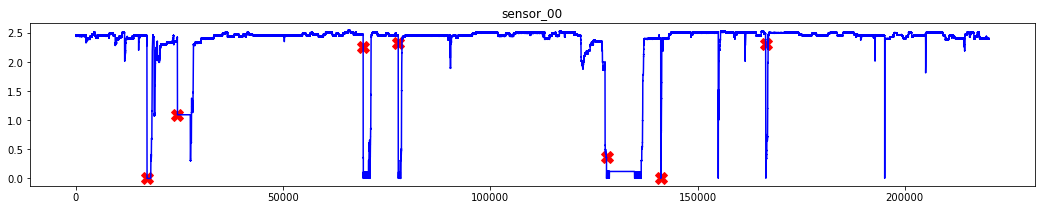

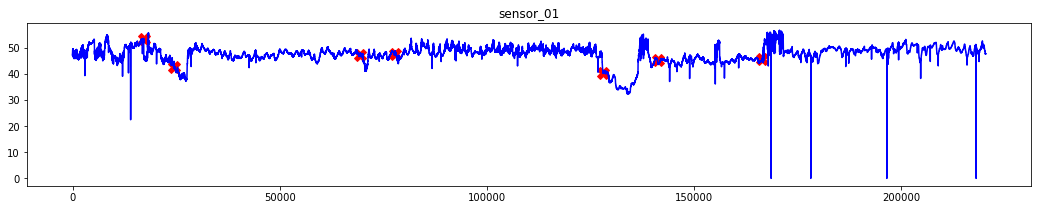

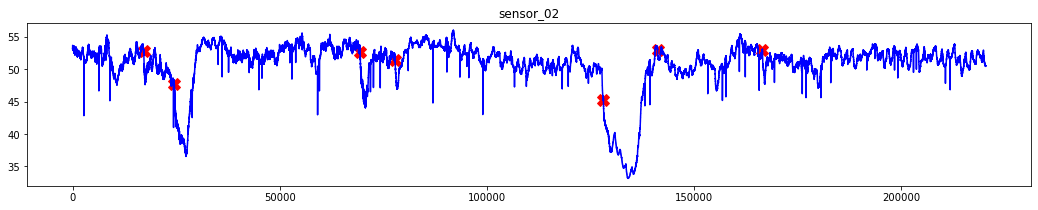

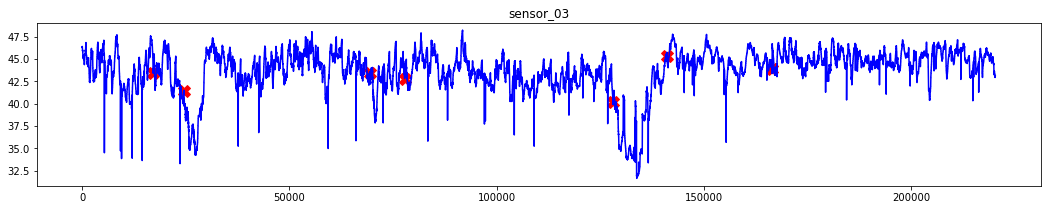

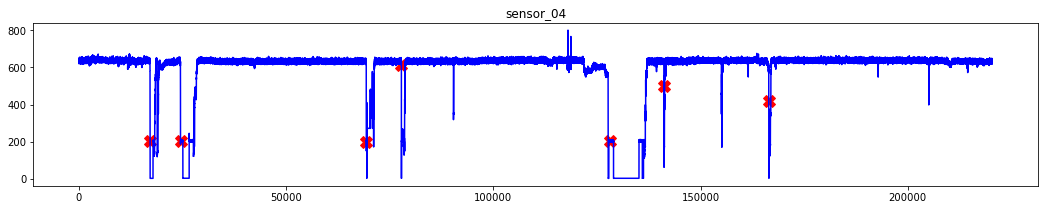

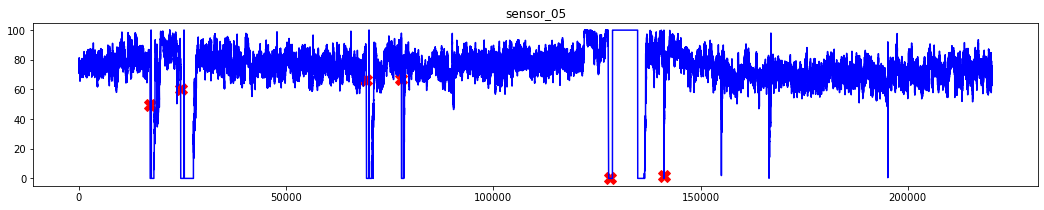

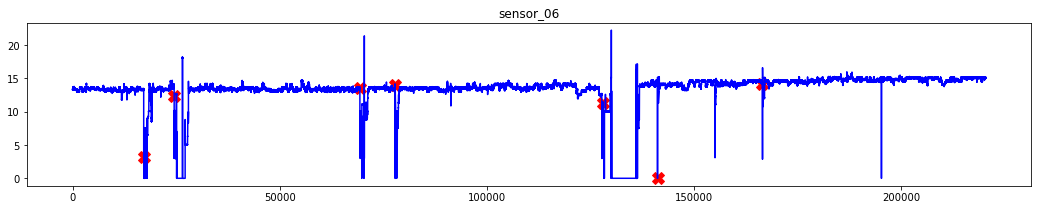

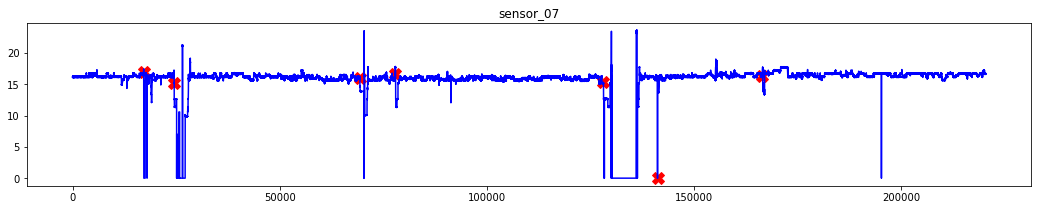

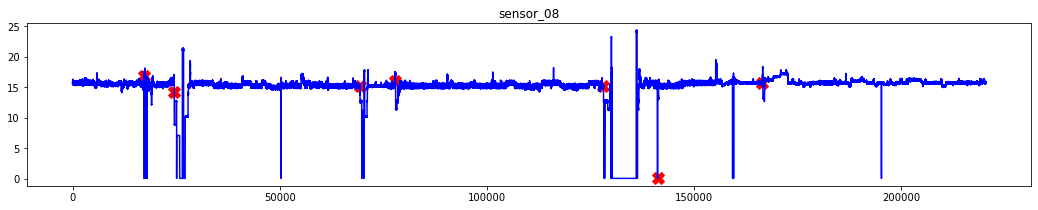

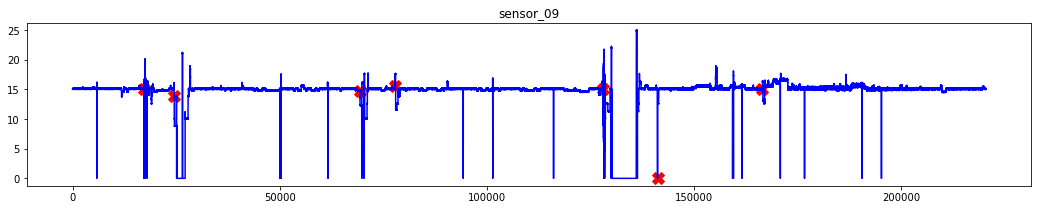

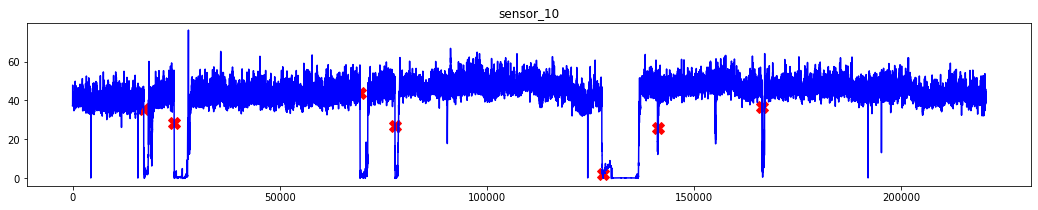

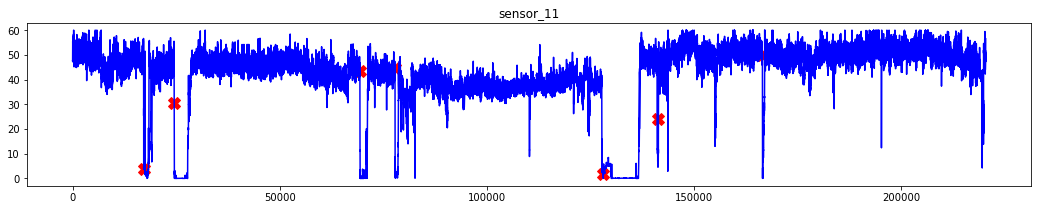

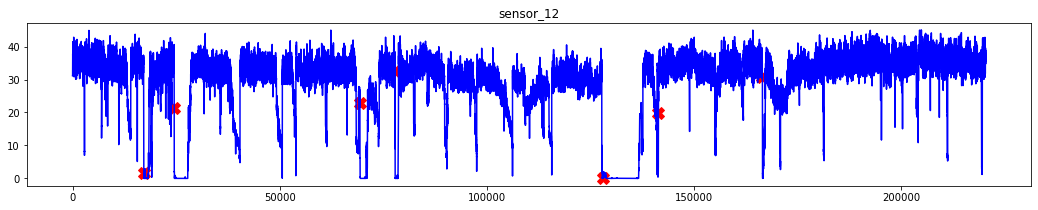

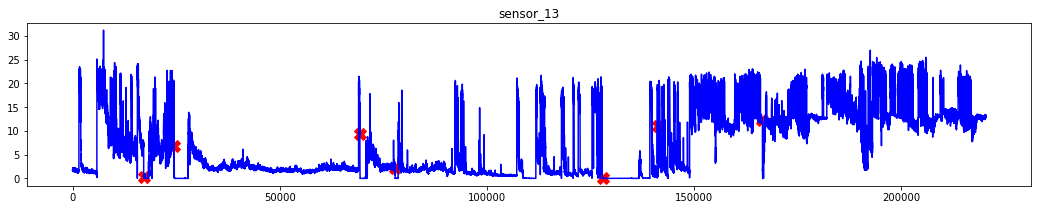

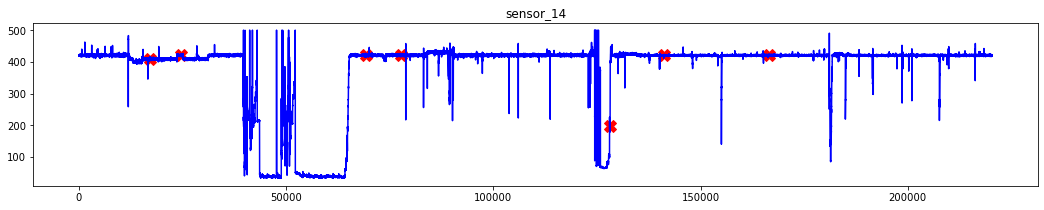

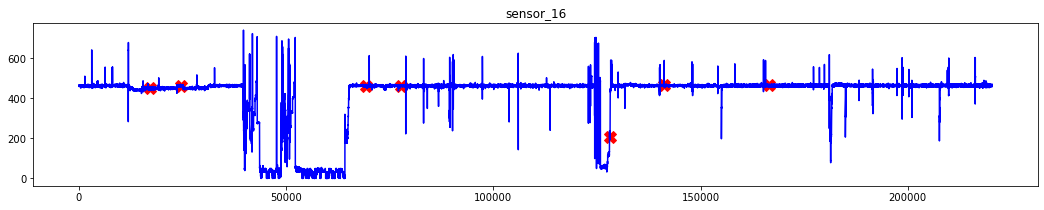

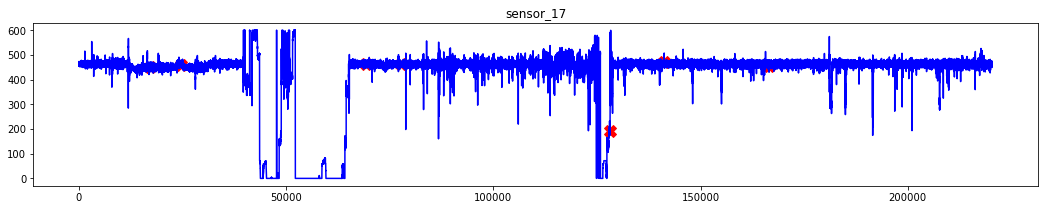

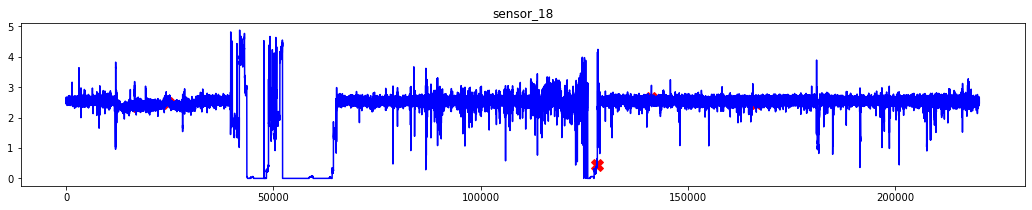

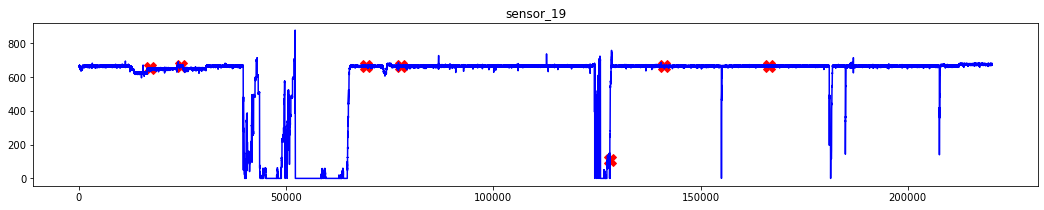

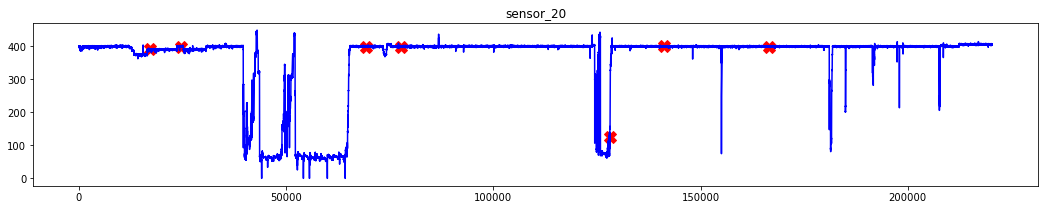

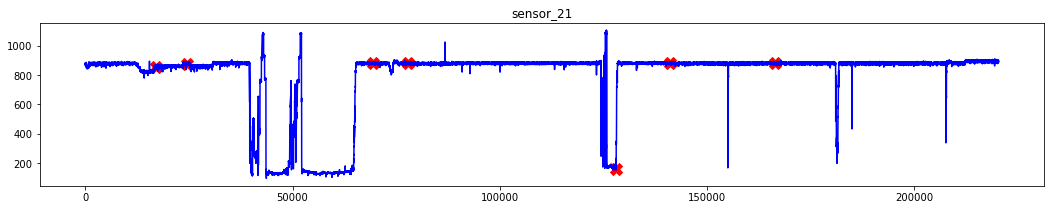

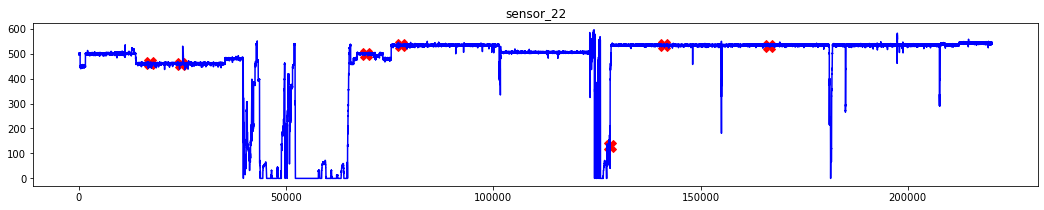

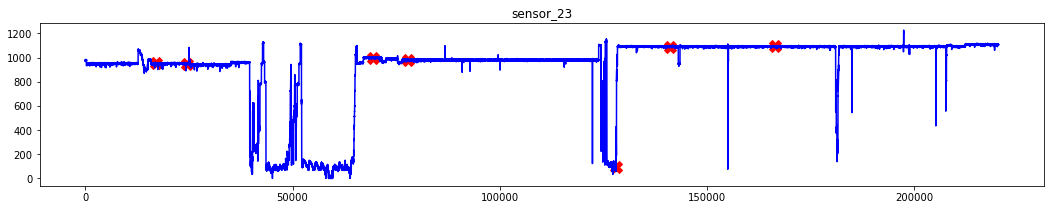

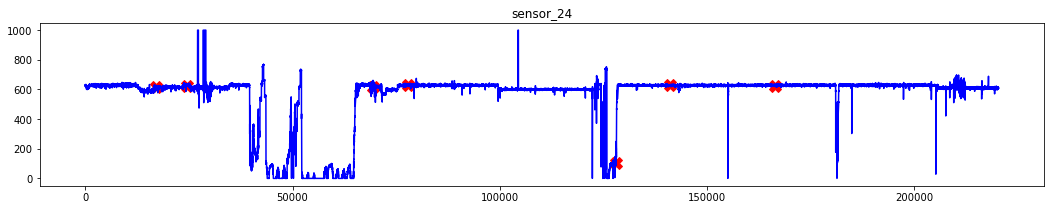

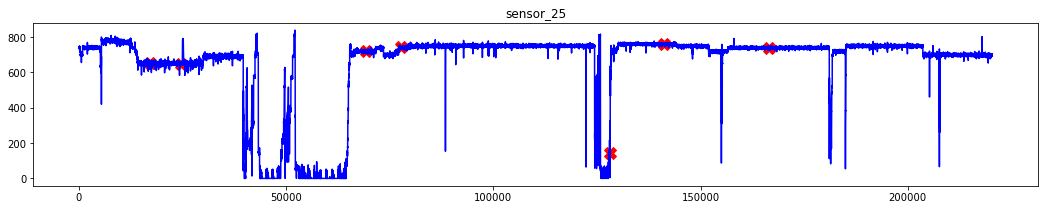

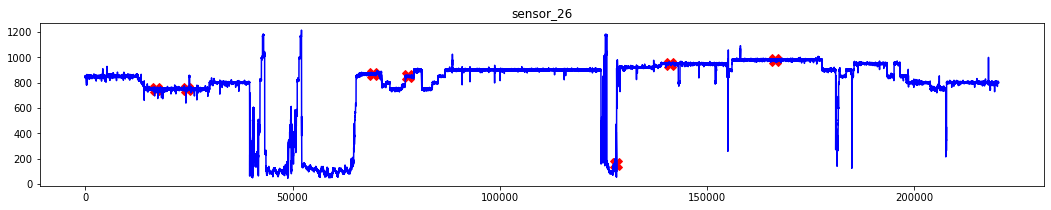

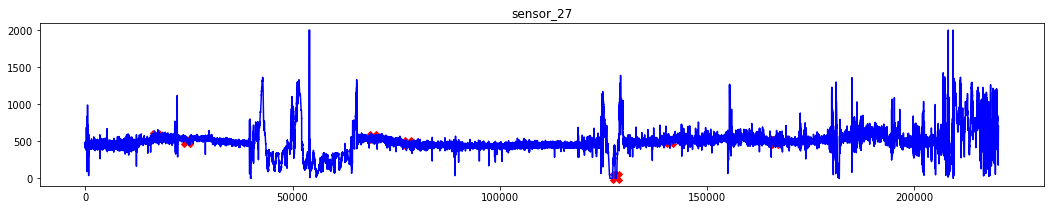

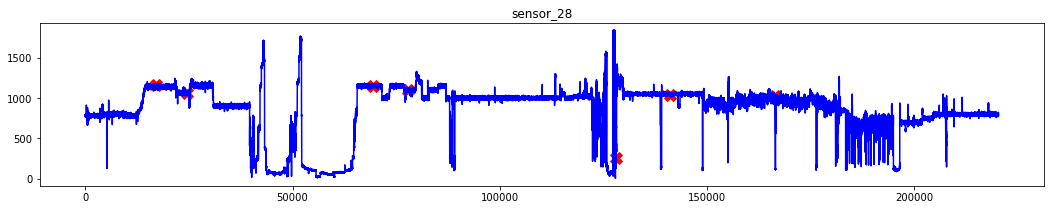

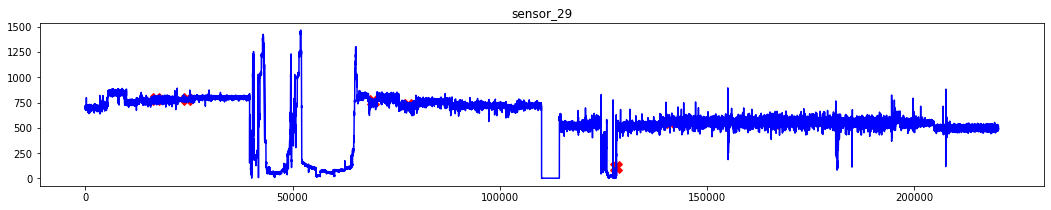

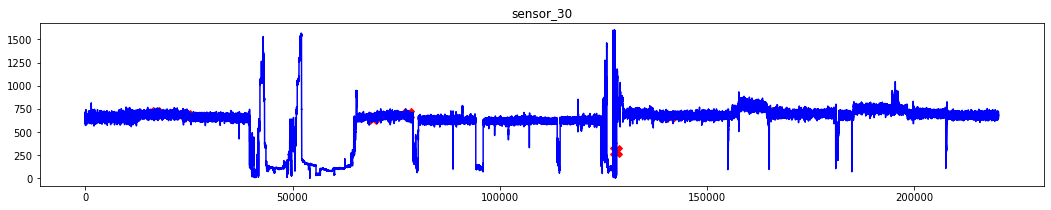

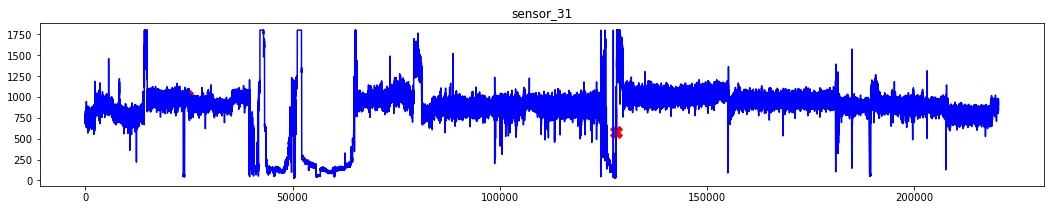

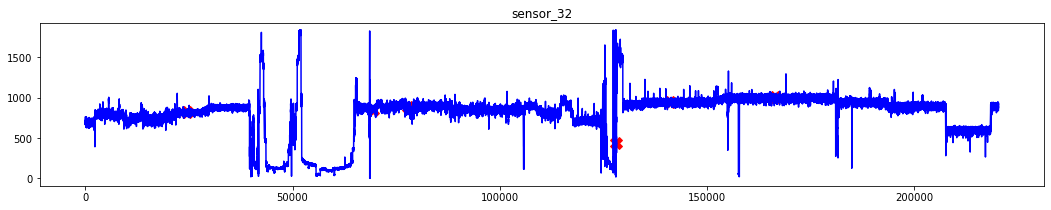

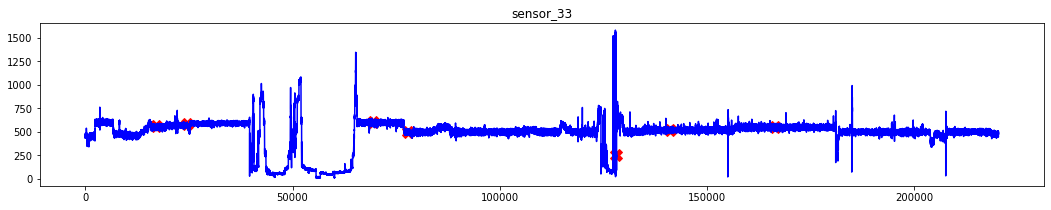

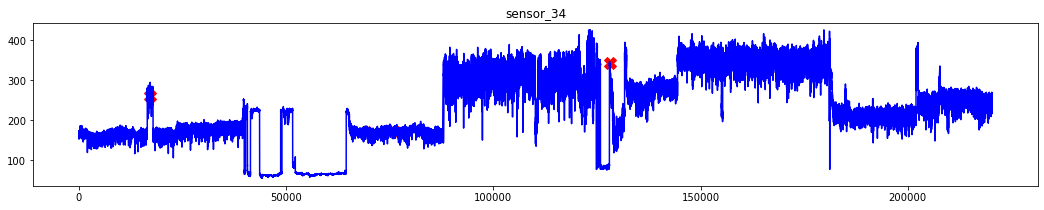

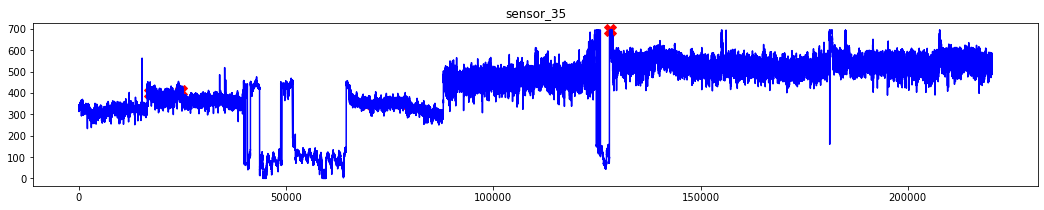

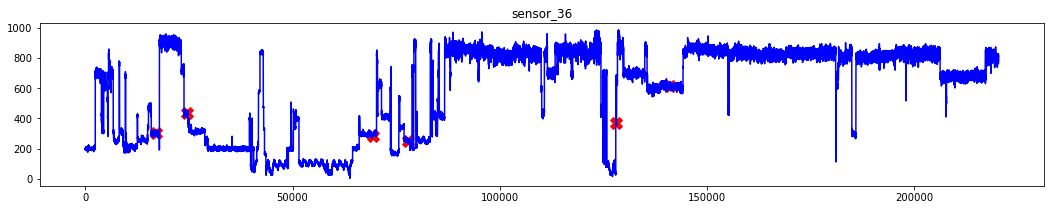

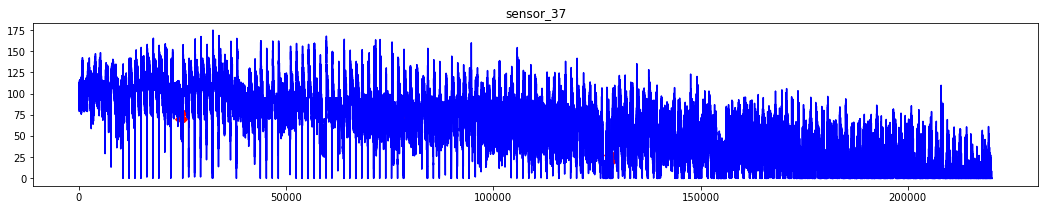

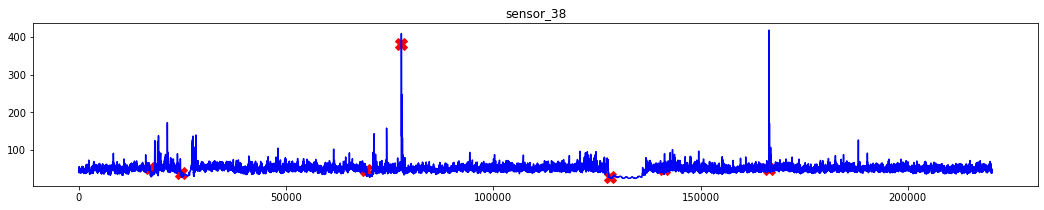

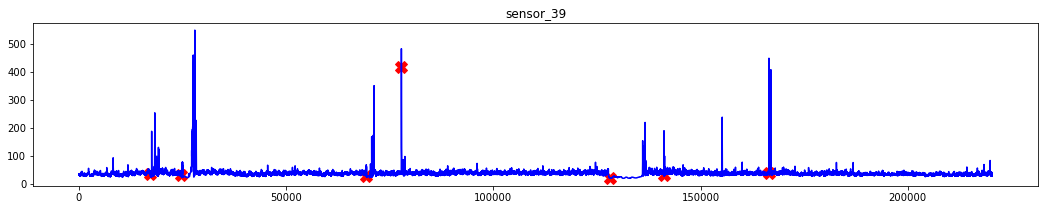

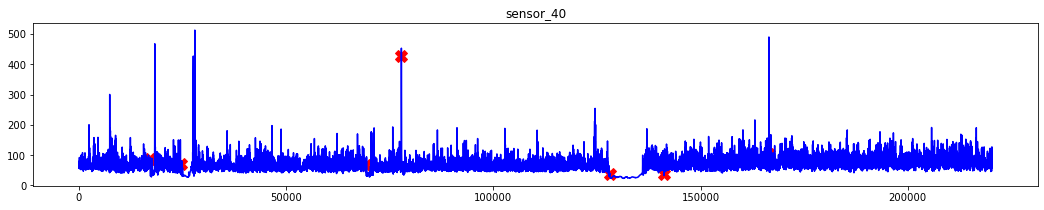

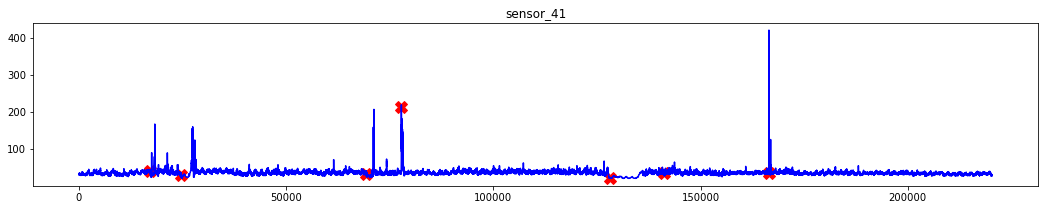

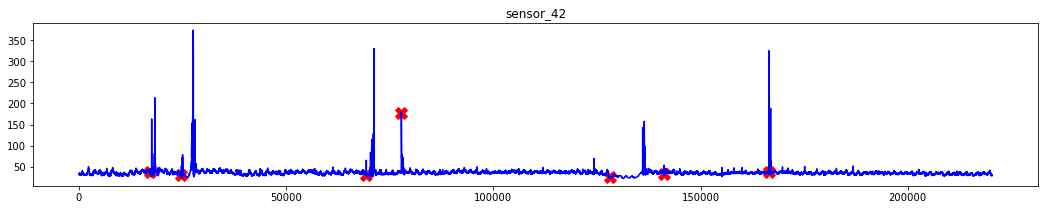

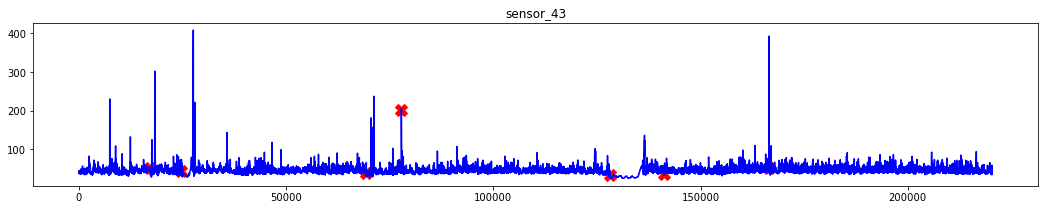

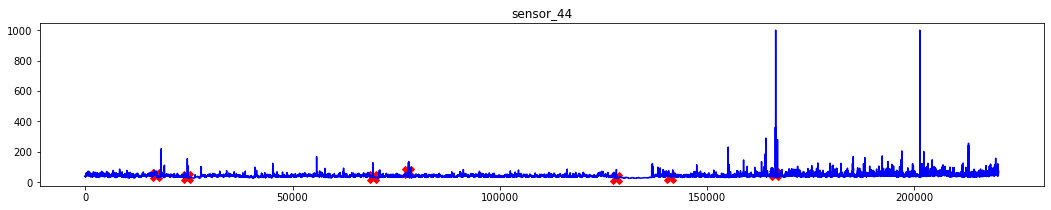

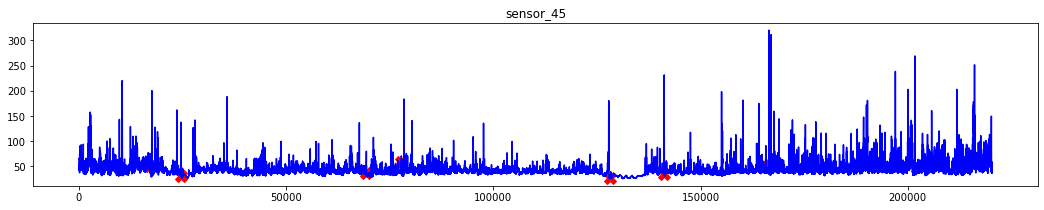

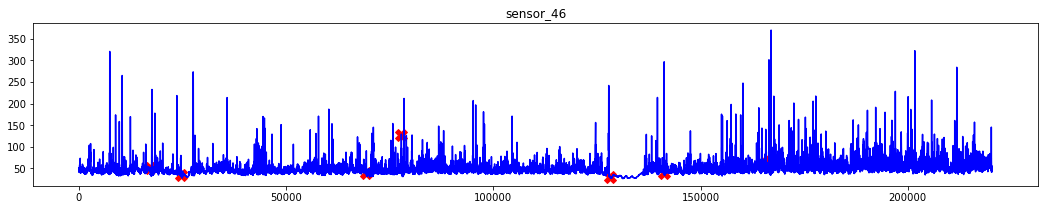

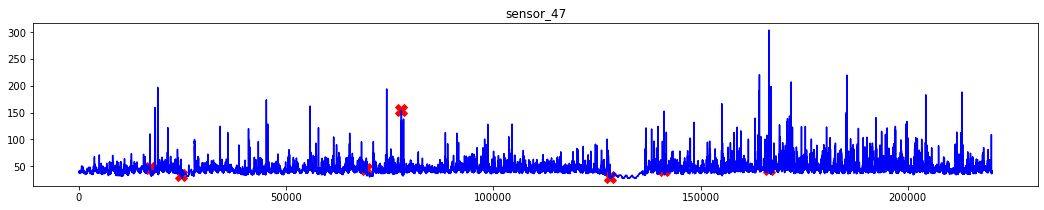

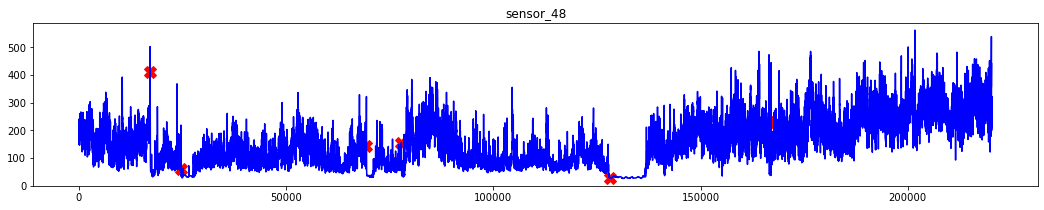

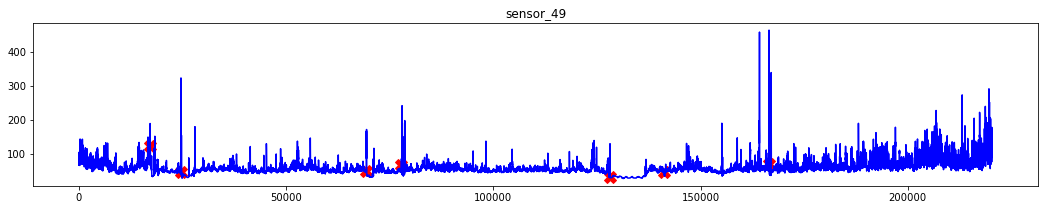

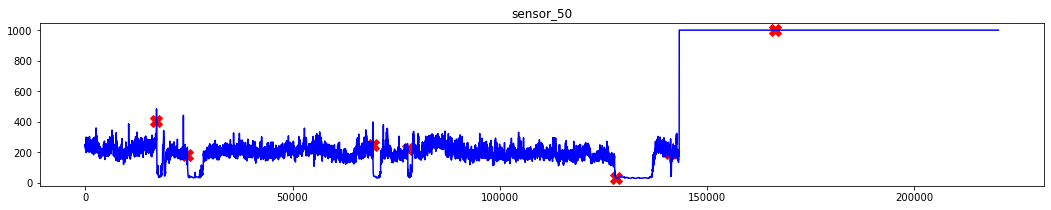

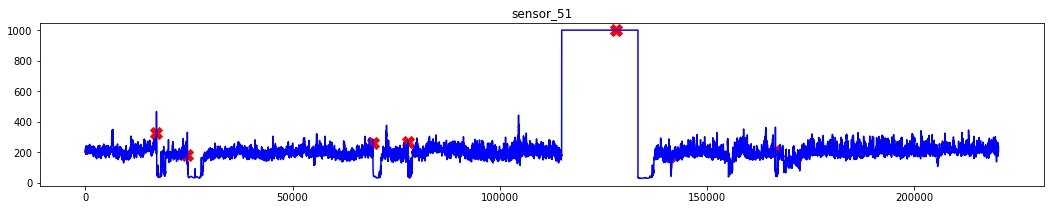

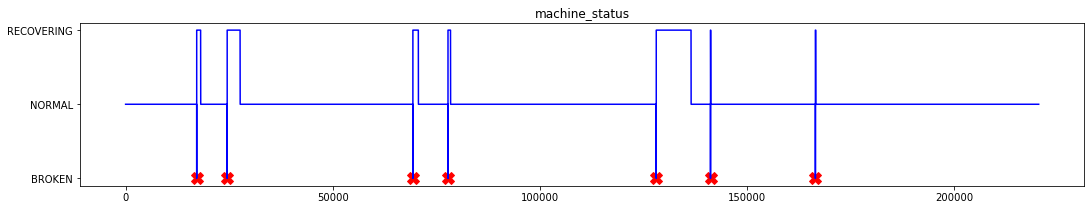

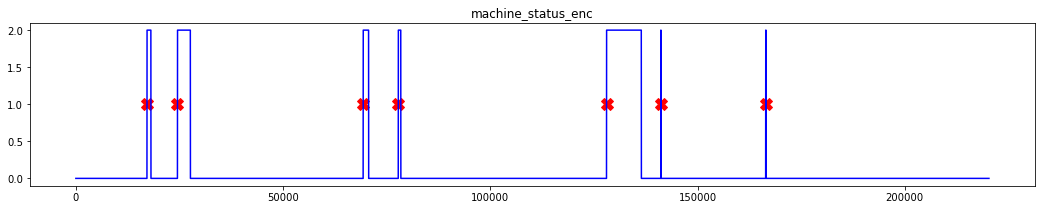

In [20]:
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[name], color='blue')
    _ = plt.title(name)
    plt.show()

For time series plots, we'll reset the index to the "timestamp" column.

In [21]:
names = names.drop(['timestamp','machine_status','machine_status_enc'])
df.set_index(df['timestamp'], inplace=True)

Plot time series for each sensor with its mean and standard deviation

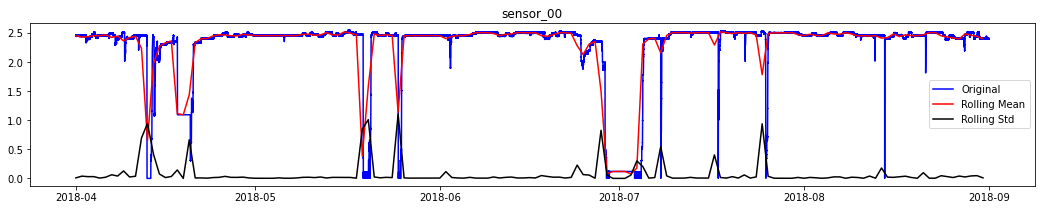

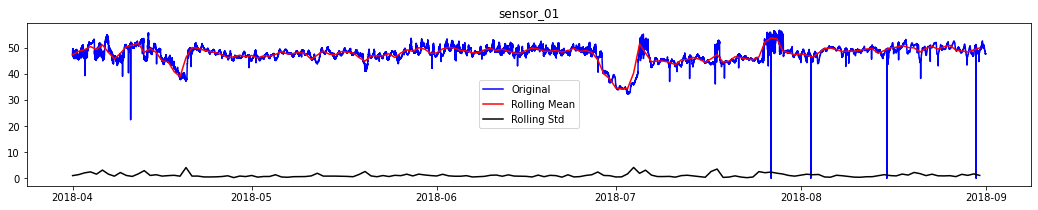

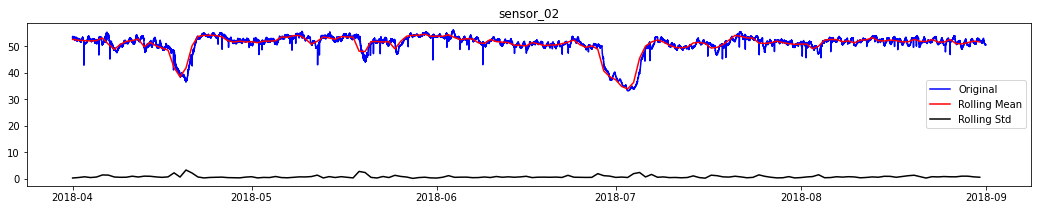

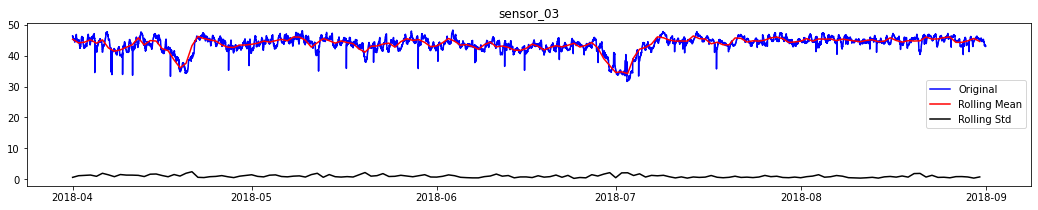

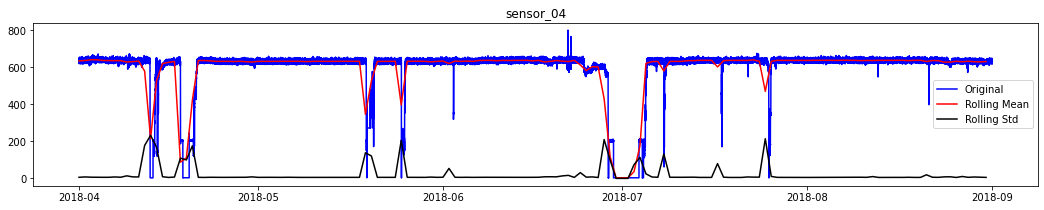

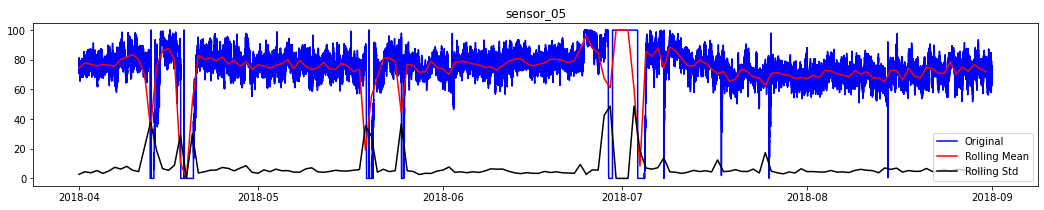

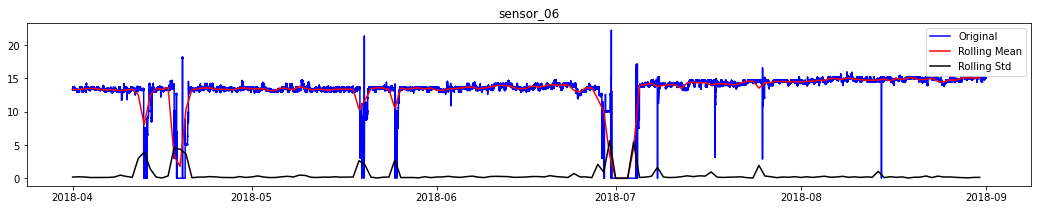

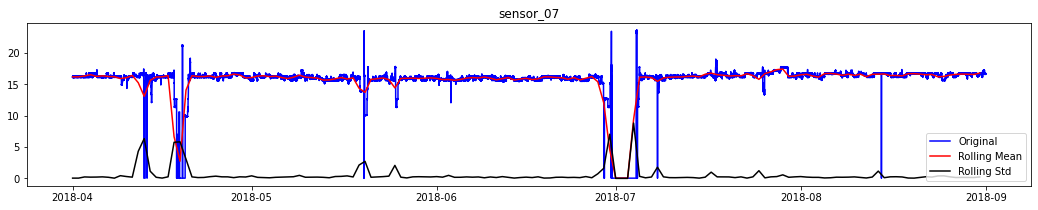

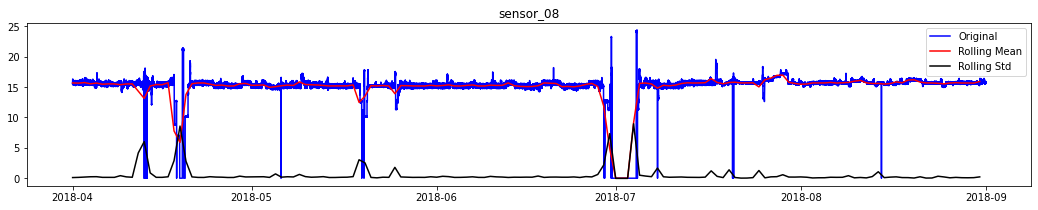

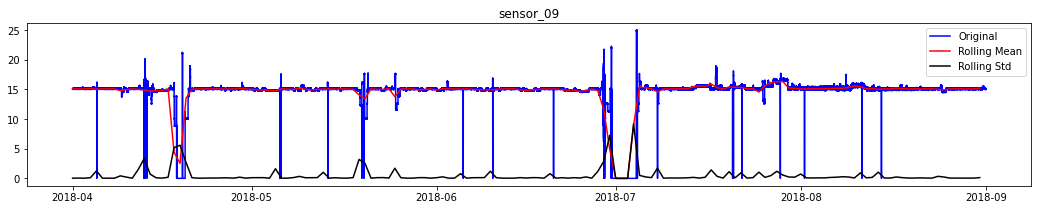

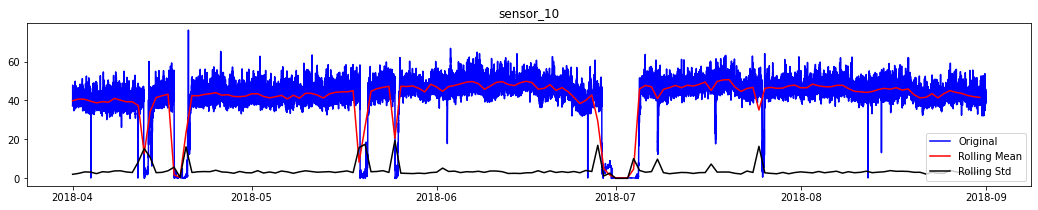

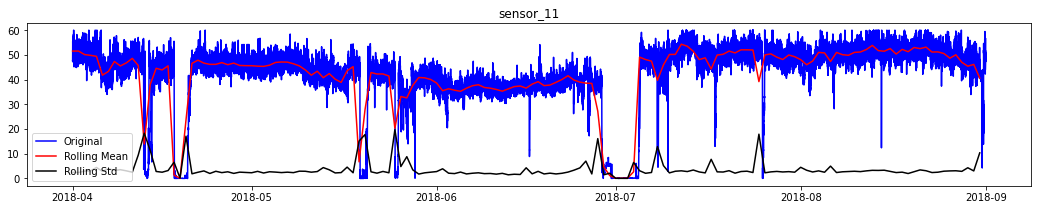

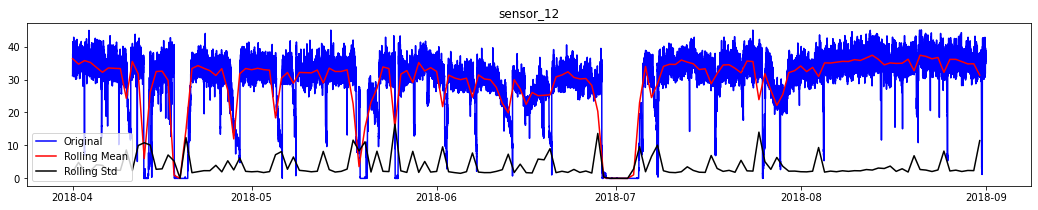

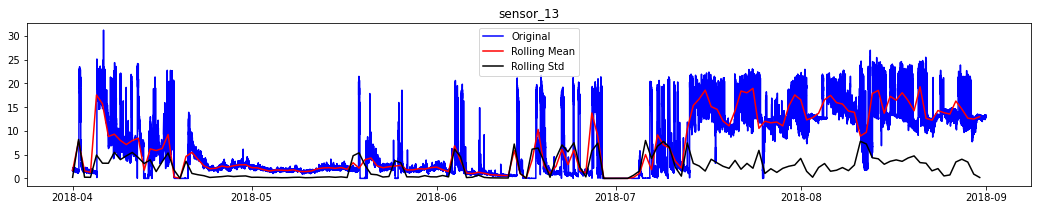

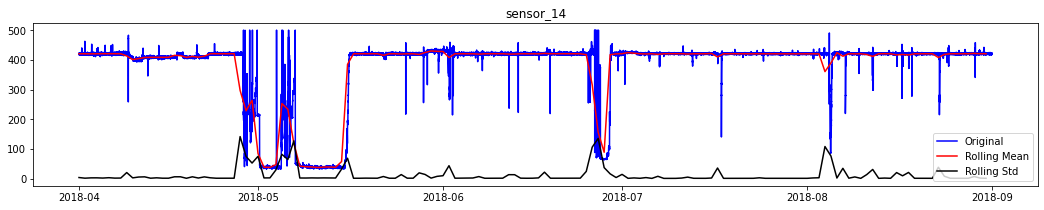

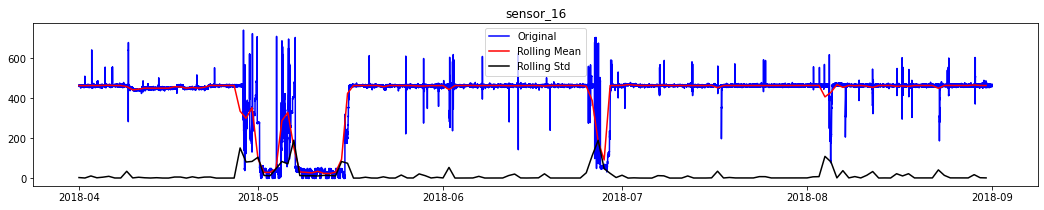

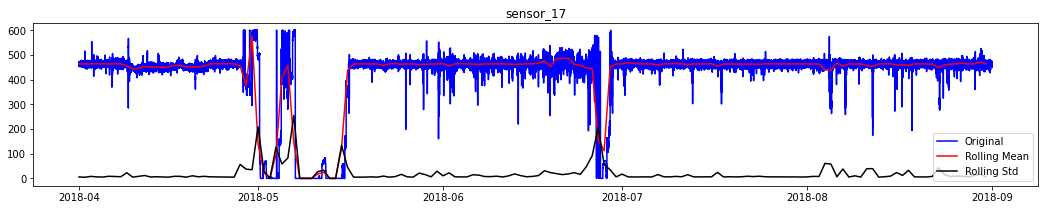

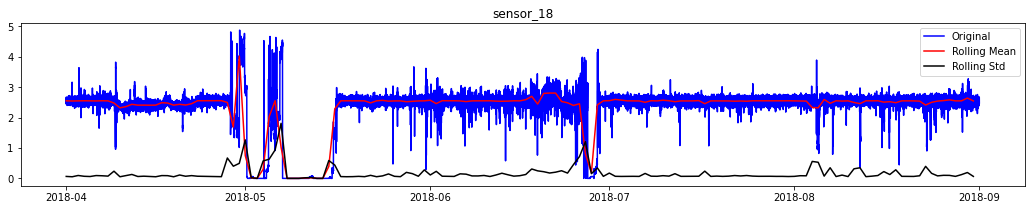

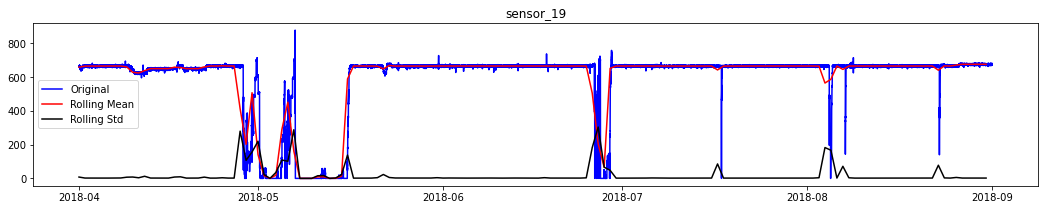

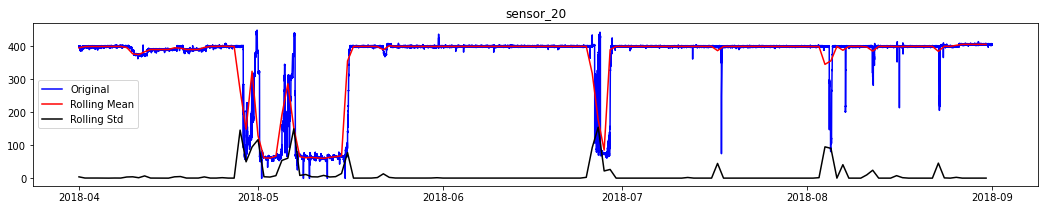

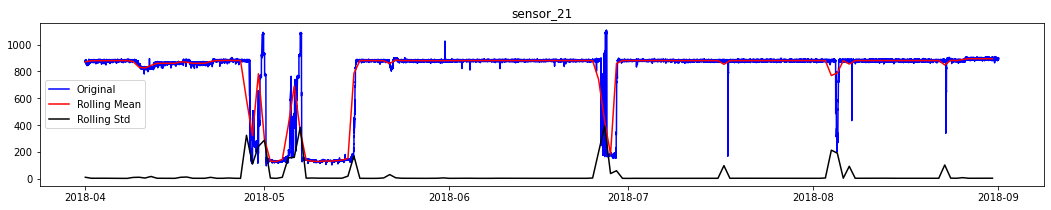

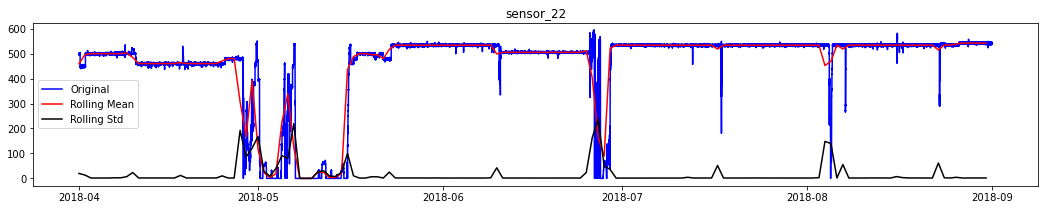

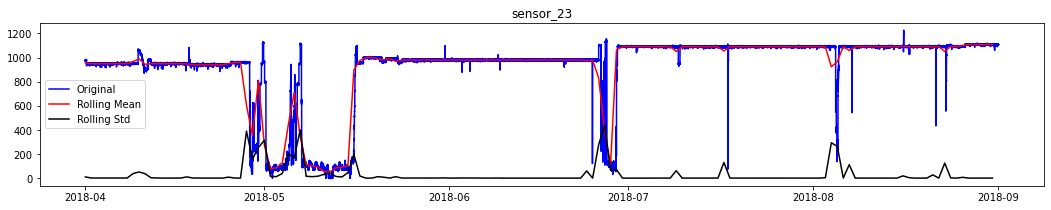

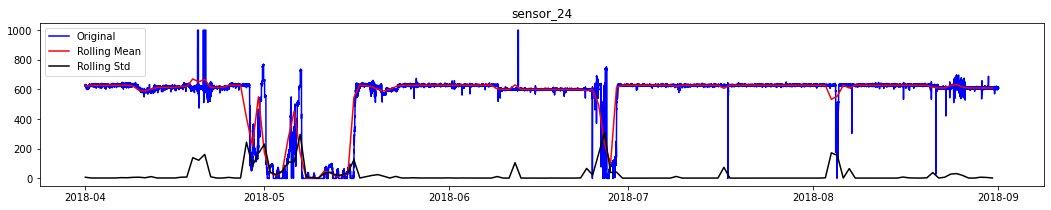

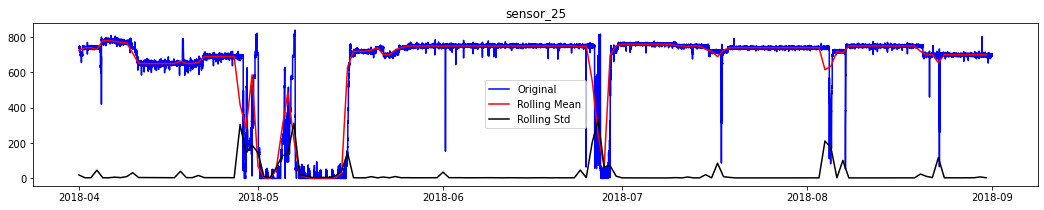

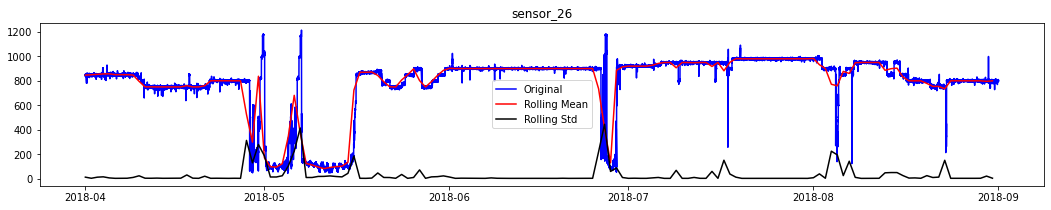

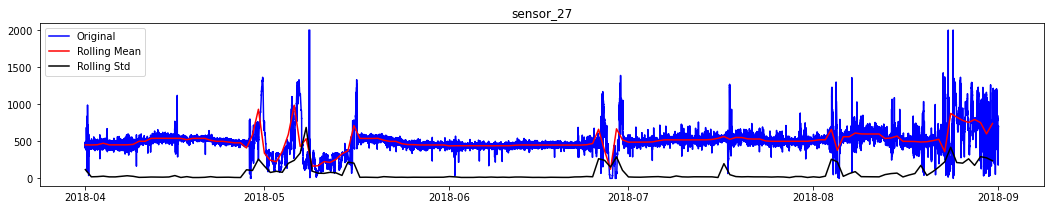

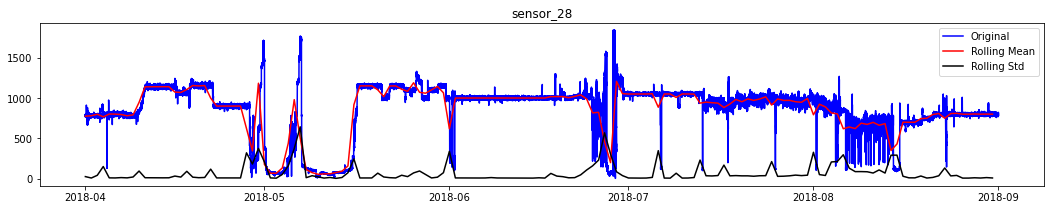

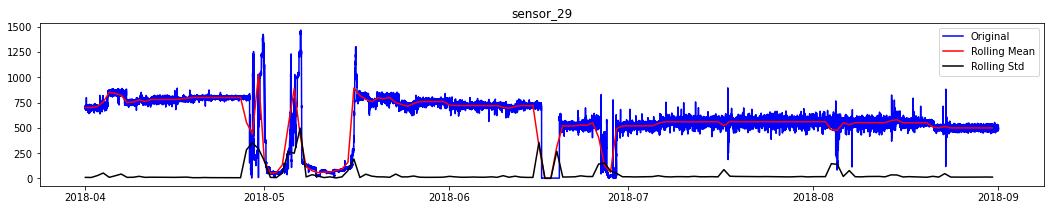

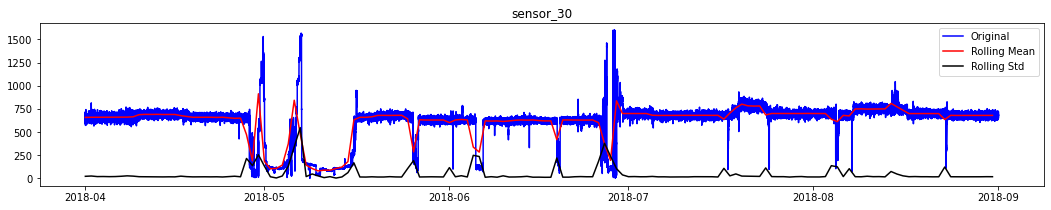

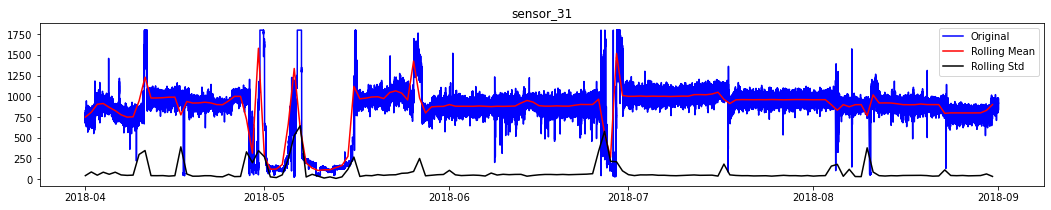

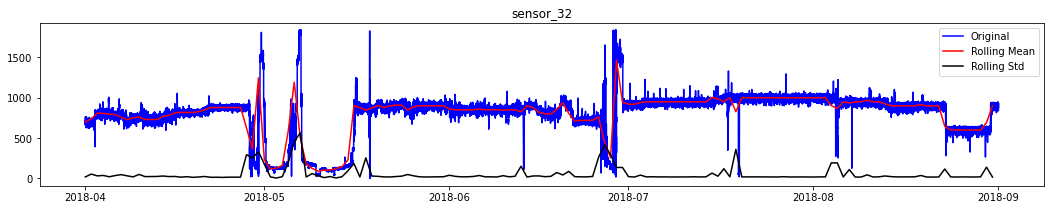

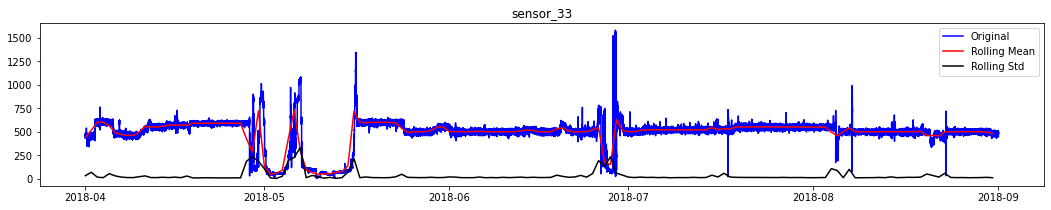

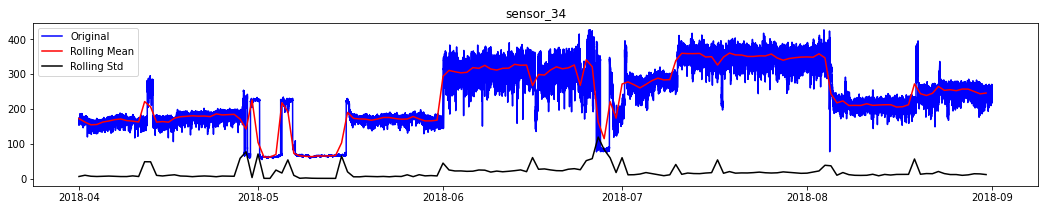

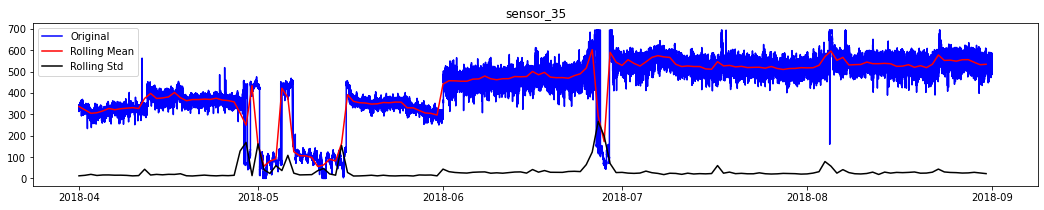

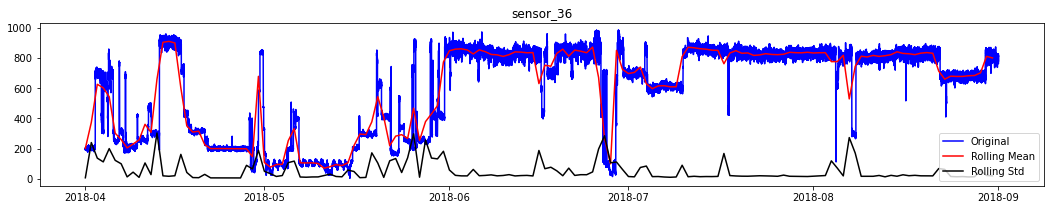

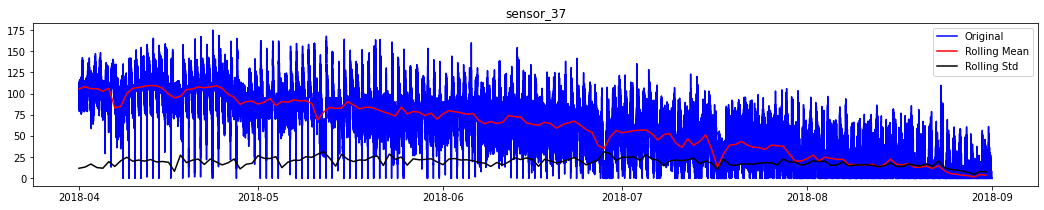

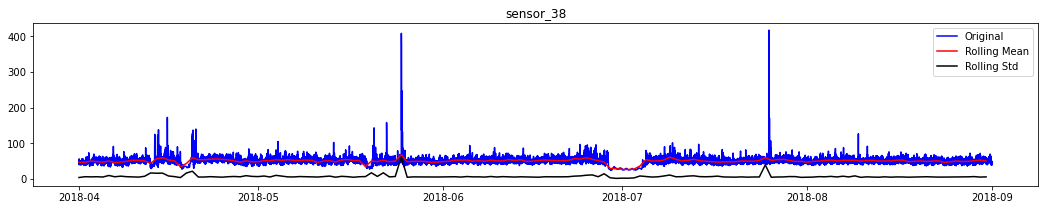

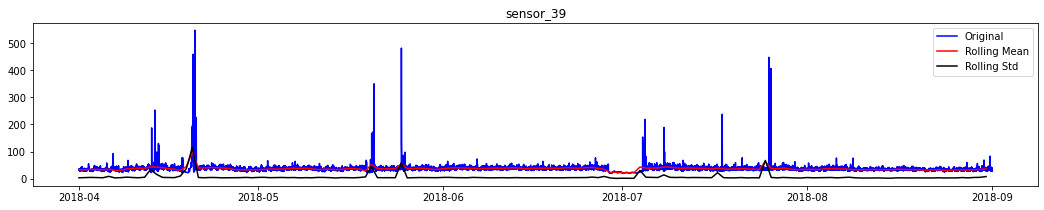

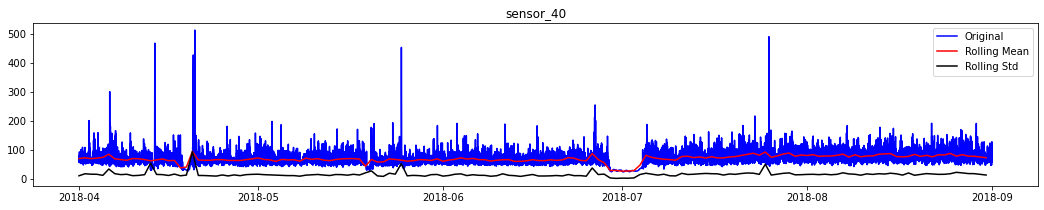

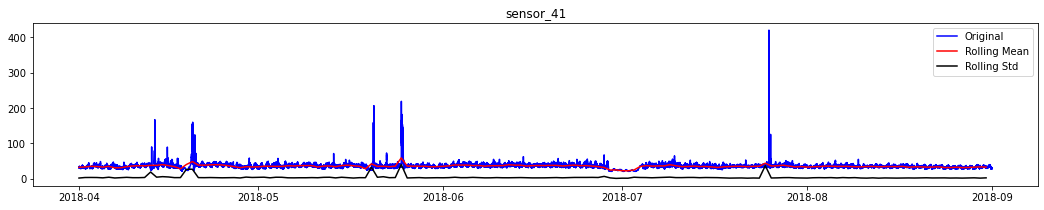

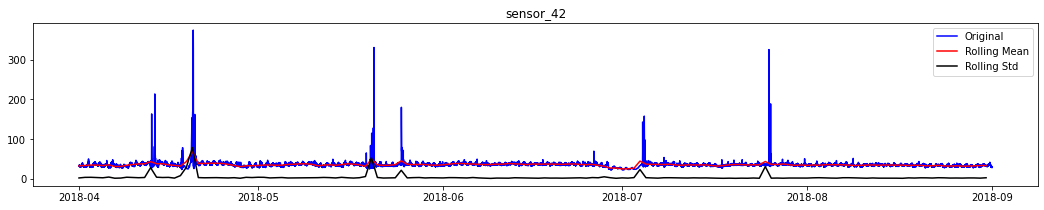

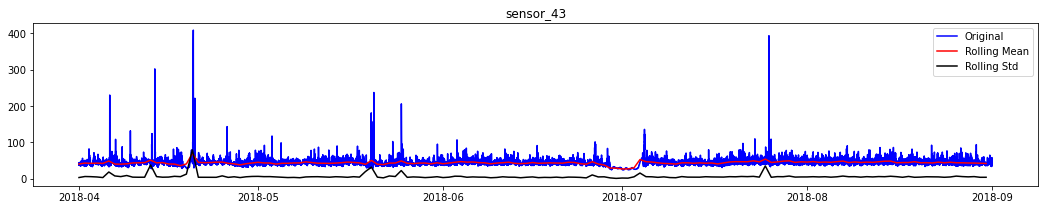

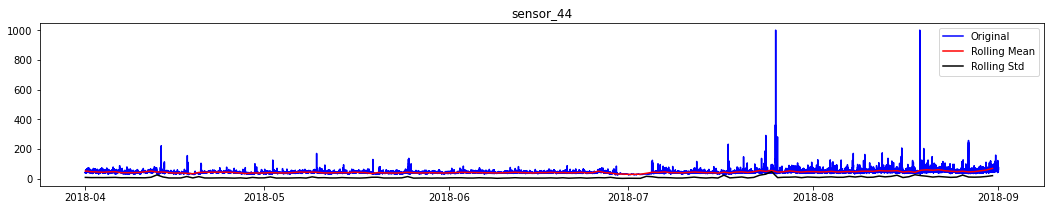

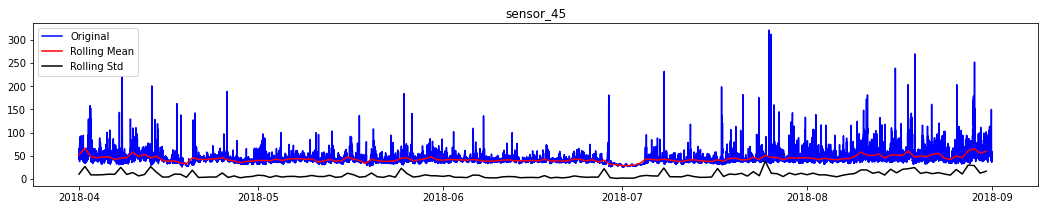

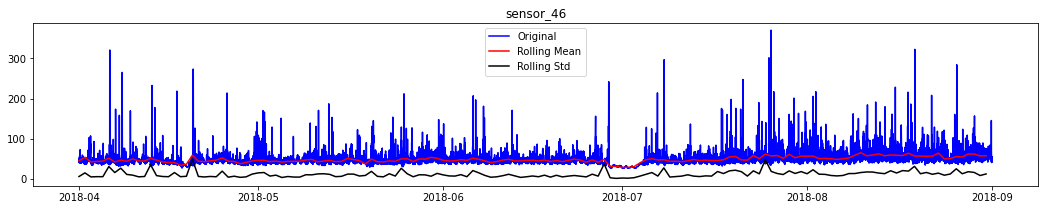

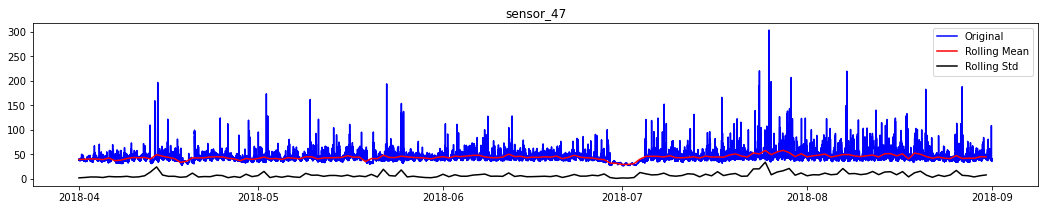

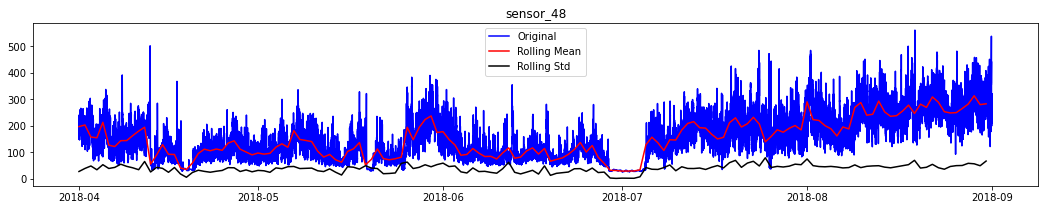

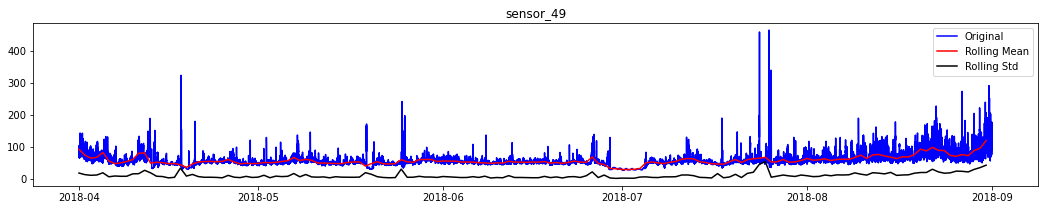

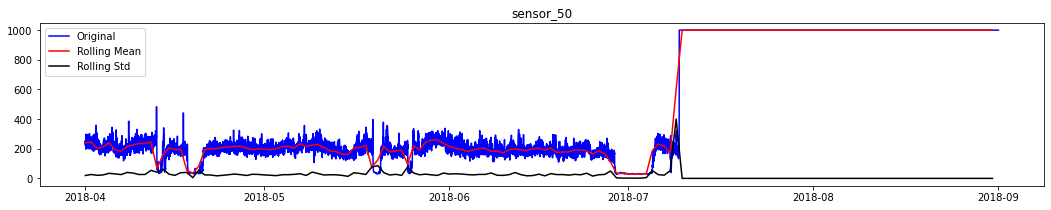

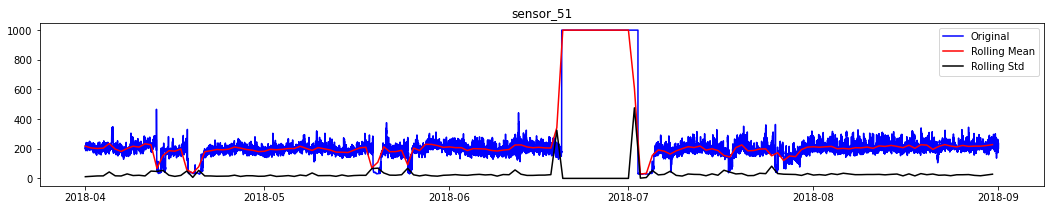

In [22]:
rollmean = df.resample(rule='D').mean()
rollstd = df.resample(rule='D').std()
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

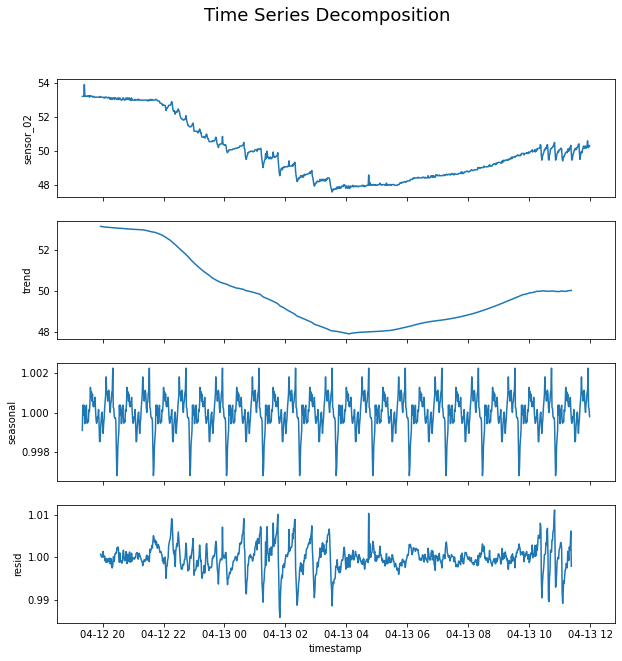

In [30]:
dd.plot_time_series(df_subset, col="sensor_02", decompose=True, model="multiplicative",period=6*12)

Now, we'll use the anomaly detection function.

In [9]:
from data_describe.anomaly.detection import anomaly_detection

In [10]:
df.reset_index(drop=True, inplace=True)

We will take a subset of the data for faster runtime, but we want to select a slice where the pump is broken at least once.

In [11]:
df.loc[df['machine_status_enc'] == 1]

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
17155  2018-04-12 21:55:00   0.000000  53.342010  52.821180  43.402775   
24510  2018-04-18 00:30:00   1.093982  42.534720  47.699650  41.449650   
69318  2018-05-19 03:18:00   2.258796  47.265630  52.734370  43.446178   
77790  2018-05-25 00:30:00   2.321759  47.482640  51.475693  42.795135   
128040 2018-06-28 22:00:00   0.364005  40.190970  45.225690  40.190971   
141131 2018-07-08 00:11:00   0.001968  45.138890  52.907990  45.355900   
166440 2018-07-25 14:00:00   2.318808  45.833332  52.994790  43.880210   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  \
17155   202.526031   49.79289   3.219039  16.890910  16.869210  ...   
24510   206.038757   60.30106  12.304690  15.154800  14.185470  ...   
69318   200.115738   66.14643  13.592300  15.914350  15.147570  ...   
77790   612.152800   67.30158  14.062500  16.608800  15.943290  ...   
128040  201.368622    0.00000  11.335360  15.270540  15.183740  ...   
141131  500.000000    1.40131   0.028935   0.036169   0.036169  ...   
166440  420.503448   72.52040  14.185470  16.247110  15.697340  ...   

        sensor_44  sensor_45   sensor_46   sensor_47   sensor_48   sensor_49  \
17155    50.92593  51.215280   50.636570   46.006940  409.143500  121.527800   
24510    34.72222  31.539350   34.432870   33.275460   59.895830   44.560180   
69318    35.01157  37.905090   39.062500   45.428240  144.675900   49.768520   
77790    65.68287  57.870370  127.893500  153.935200  155.381900   65.682870   
128040   28.06713  28.067129   29.513889   29.224537   29.224537   29.513889   
141131   37.32639  35.300930   38.194440   43.402780   99.537030   44.849540   
166440   52.10200  52.662040   67.129630   43.981480  230.324100   69.733800   

          sensor_50  sensor_51  machine_status  machine_status_enc  
17155    401.909700   324.6528          BROKEN                   1  
24510    177.662000   183.7384          BROKEN                   1  
69318    246.238400   257.5231          BROKEN                   1  
77790    220.196800   267.3611          BROKEN                   1  
128040    32.407406  1000.0000          BROKEN                   1  
141131   192.129600   174.7685          BROKEN                   1  
166440  1000.000000   205.7292          BROKEN                   1  

[7 rows x 54 columns]

Since datapoint 17155 is at a broken status, we can select a slice of the data that contains this.

In [11]:
df_subset = df[17000:18000]

In [12]:
df_subset

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
17000 2018-04-12 19:20:00   2.459491   52.90799  53.211800  45.572914   
17001 2018-04-12 19:21:00   2.448669   52.95139  53.211803  45.572914   
17002 2018-04-12 19:22:00   2.456539   52.95139  53.211800  45.572914   
17003 2018-04-12 19:23:00   2.453588   52.90799  53.255210  45.572910   
17004 2018-04-12 19:24:00   2.453588   52.90799  53.906250  45.529510   
...                   ...        ...        ...        ...        ...   
17995 2018-04-13 11:55:00   0.000000   47.39583  50.607640  44.314236   
17996 2018-04-13 11:56:00   0.000000   47.39583  50.217010  44.314236   
17997 2018-04-13 11:57:00   0.000000   47.48264  50.217010  44.314236   
17998 2018-04-13 11:58:00   0.000000   47.52604  50.347220  44.314240   
17999 2018-04-13 11:59:00   0.000000   47.56944  50.303820  44.270830   

        sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_44  \
17000  637.615700   80.61912  13.317420   16.42795   15.73351  ...  56.712960   
17001  630.555500   79.03892  13.382520   16.39178   15.76968  ...  54.687500   
17002  628.125000   79.96098  13.346350   16.42795   15.58160  ...  52.662040   
17003  632.291600   78.65805  13.252310   16.39178   15.65393  ...  50.925930   
17004  647.800900   79.70905  13.317420   16.39178   15.69734  ...  49.479170   
...           ...        ...        ...        ...        ...  ...        ...   
17995  201.409119    0.00000   6.553819   16.39178   16.37731  ...  35.879630   
17996  203.492462    0.00000   6.553819   16.34115   16.38455  ...  36.168980   
17997  204.262131    0.00000   6.539352   16.34115   16.50752  ...  35.879630   
17998  202.450790    0.00000   6.553819   16.39178   16.46412  ...  35.879631   
17999  201.524857    0.00000   6.539352   16.39178   16.42072  ...  35.879631   

       sensor_45  sensor_46  sensor_47   sensor_48   sensor_49   sensor_50  \
17000  45.138889  46.006943  45.138889  214.699100  120.659700  299.189800   
17001  44.849537  46.006940  45.428240  220.196800  120.081000  299.189800   
17002  44.560180  45.428240  46.006940  229.166700  119.791700  300.057900   
17003  44.560180  45.138890  45.428240  233.506900  119.213000  302.083300   
17004  43.981480  45.138890  45.428242  234.953700  118.634300  304.398100   
...          ...        ...        ...         ...         ...         ...   
17995  35.879631  36.168980  36.747684   35.011574   35.011574   37.326389   
17996  35.879631  36.168980  36.747684   35.011574   35.011570   37.326389   
17997  35.879631  36.458330  36.747684   35.011574   35.300930   37.326389   
17998  35.879630  36.458332  36.747684   35.011574   35.011570   37.326389   
17999  35.300930  36.458332  36.747684   35.011570   35.300930   37.326389   

        sensor_51  machine_status  machine_status_enc  
17000  254.340300          NORMAL                   0  
17001  253.182900          NORMAL                   0  
17002  252.314800          NORMAL                   0  
17003  253.761600          NORMAL                   0  
17004  255.787000          NORMAL                   0  
...           ...             ...                 ...  
17995   37.615740      RECOVERING                   2  
17996   37.615742      RECOVERING                   2  
17997   37.615742      RECOVERING                   2  
17998   37.615742      RECOVERING                   2  
17999   37.615742      RECOVERING                   2  

[1000 rows x 54 columns]

One method of detecting outliers and anomalies is to forecast in a stepwise fashion and find those points that are outside of a specified confidence interval from the prediction. We will set estimator="arima".I've 

In [14]:
widget_arima = anomaly_detection(df_subset, target="sensor_00", estimator="arima",
                  date_col="timestamp", n_periods=7, time_split_index=20)

Fitting models: 100%|██████████| 1/1 [00:00<00:00, 15650.39it/s]


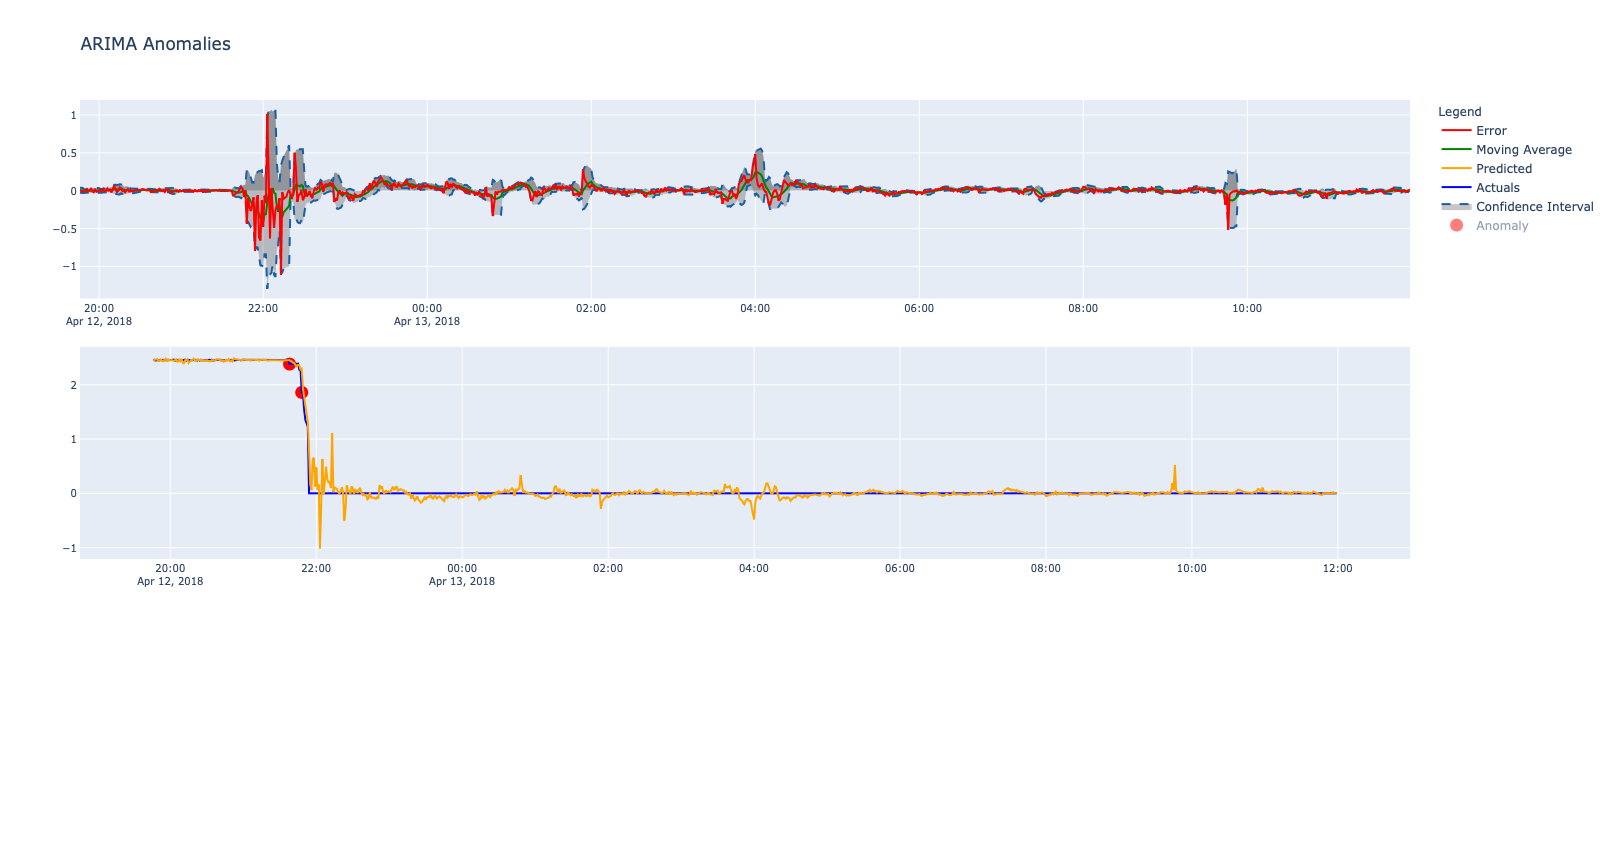

In [15]:
widget_arima.show(viz_backend='plotly')

Now, we can select the sensors that are most correlated with machine status, and try to find a pattern in the detected anomalies. 

In [13]:
selected_columns = ['sensor_00','sensor_02','sensor_04','sensor_06','sensor_10','sensor_11','sensor_50']

In [14]:
df_broken = df[selected_columns]
df_broken

sensor_00  sensor_02   sensor_04  sensor_06  sensor_10  sensor_11  \
0        2.465394  53.211800  634.375000   13.41146   37.22740   47.52422   
1        2.465394  53.211800  634.375000   13.41146   37.22740   47.52422   
2        2.444734  53.211800  638.888900   13.32465   37.86777   48.17723   
3        2.460474  53.168400  628.125000   13.31742   38.57977   48.65607   
4        2.445718  53.211800  636.458300   13.35359   39.48939   49.06298   
...           ...        ...         ...        ...        ...        ...   
220315   2.407350  50.520830  634.722229   15.11863   43.17085   54.16052   
220316   2.400463  50.564240  630.902771   15.15480   43.21038   54.52602   
220317   2.396528  50.520830  625.925903   15.08970   43.12836   55.11779   
220318   2.406366  50.520832  635.648100   15.11863   42.35746   55.99321   
220319   2.396528  50.520832  639.814800   15.11863   42.62814   56.49642   

        sensor_50  
0        243.0556  
1        243.0556  
2        241.3194  
3        240.4514  
4        242.1875  
...           ...  
220315  1000.0000  
220316  1000.0000  
220317  1000.0000  
220318  1000.0000  
220319  1000.0000  

[220320 rows x 7 columns]

Setting estimator="auto" will apply the methods of Isolation Forest and Local Outlier Detection to flag potential anomalies. With these methods we can pass mutliple sensors as the training data.

In [59]:
auto_widget_arima = anomaly_detection(df_broken, estimator="auto",
                  date_col="index", n_periods=7)

Fitting models: 100%|██████████| 2/2 [00:15<00:00,  7.56s/it]


In [60]:
auto_widget_arima.viz_data

IsolationForest  LocalOutlierFactor
0                     1                   1
1                     1                   1
2                     1                   1
3                     1                   1
4                     1                   1
...                 ...                 ...
220315                1                   1
220316                1                   1
220317                1                   1
220318                1                   1
220319                1                   1

[220320 rows x 2 columns]

The value of -1 indicates that the model found anomalous behavior at that point. 

In [61]:
isolation_anomalies = auto_widget_arima.viz_data[auto_widget_arima.viz_data["IsolationForest"]==-1]["IsolationForest"]
isolation_anomalies

2431     -1
2432     -1
2433     -1
2434     -1
2435     -1
         ..
220184   -1
220185   -1
220187   -1
220217   -1
220218   -1
Name: IsolationForest, Length: 24424, dtype: int64

In [62]:
if_anomalies = df_broken[df_broken.index.isin(isolation_anomalies.index)]
if_anomalies

sensor_00  sensor_02   sensor_04  sensor_06  sensor_10  sensor_11  \
2431     2.341435  52.994789  632.870400   13.14381   36.01515   57.30668   
2432     2.342419  52.994790  616.898100   13.12211   35.47522   56.96770   
2433     2.363079  52.951390  618.750000   13.05700   35.46587   56.89870   
2434     2.338484  52.994790  627.430500   13.15828   34.78529   56.64501   
2435     2.343403  52.994790  619.328700   13.15828   34.68674   56.71196   
...           ...        ...         ...        ...        ...        ...   
220184   2.402431  50.607640  635.648200   15.08970   38.35754   55.18488   
220185   2.400463  50.564240  630.324100   15.19821   38.72973   54.75793   
220187   2.400463  50.607640  628.009277   15.19821   38.85770   53.63478   
220217   2.402431  50.607635  645.601868   15.01013   38.38125   42.22425   
220218   2.400463  50.607635  635.069458   15.19821   38.83923   42.72539   

        sensor_50  
2431     288.4838  
2432     287.6158  
2433     286.1690  
2434     289.6412  
2435     290.7986  
...           ...  
220184  1000.0000  
220185  1000.0000  
220187  1000.0000  
220217  1000.0000  
220218  1000.0000  

[24424 rows x 7 columns]

Now, we can plot the anomalies along the actuals to see if there is a sensible pattern. In conjuction with earlier results from the heatmap, we can see that there are moments in time where these 6 sensors have anomalous behavior around the same times.

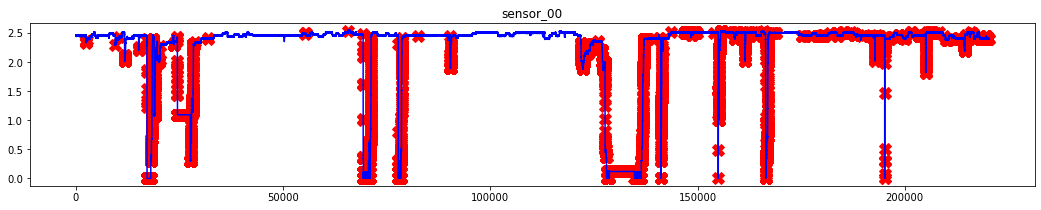

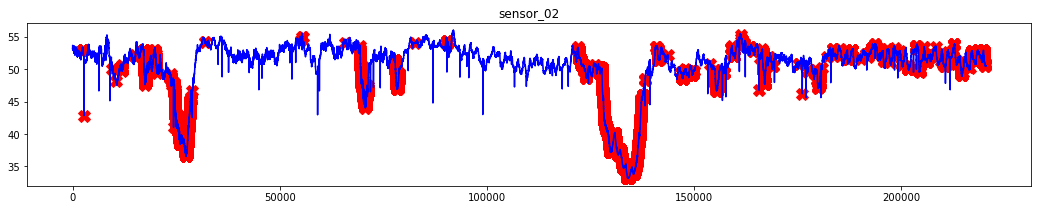

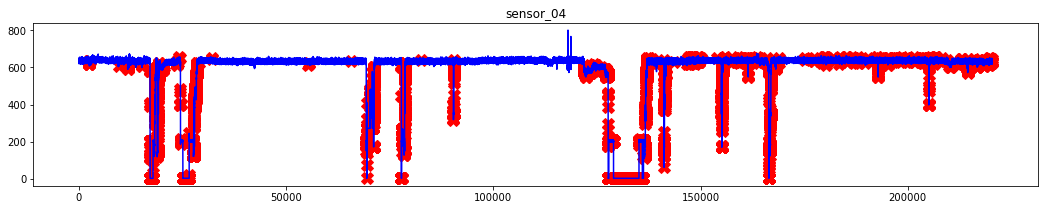

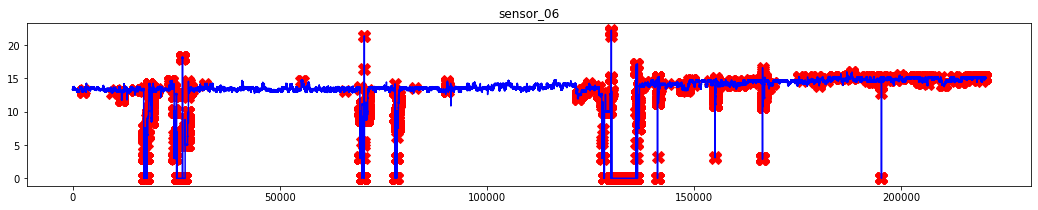

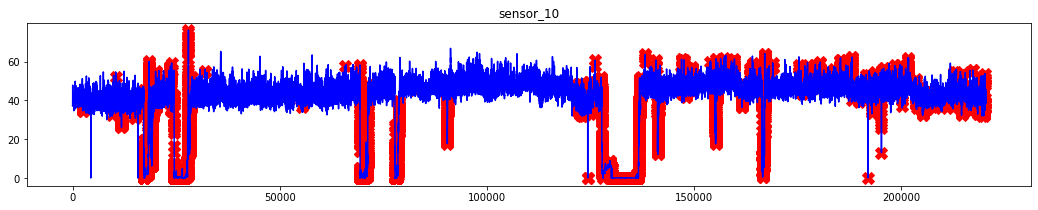

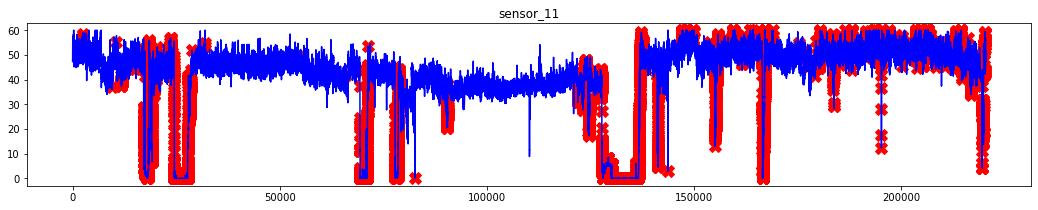

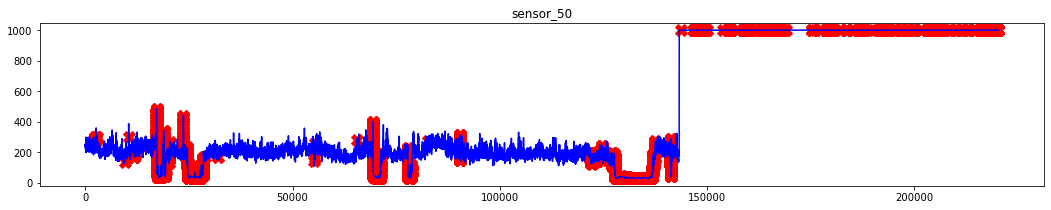

In [128]:
for name in selected_columns:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(if_anomalies[name], linestyle='none', marker='X', color='red', markersize=12) #anomalies
    _ = plt.plot(df[name], color='blue') #actuals
    _ = plt.title(name)
    plt.show()

In [48]:
df_broken_subset = df_broken[:10000]

In [92]:
hdbscan_cluster = dd.cluster(df_broken_subset, method="hdbscan", viz_backend="plotly", min_cluster_size=2000, min_samples=1)

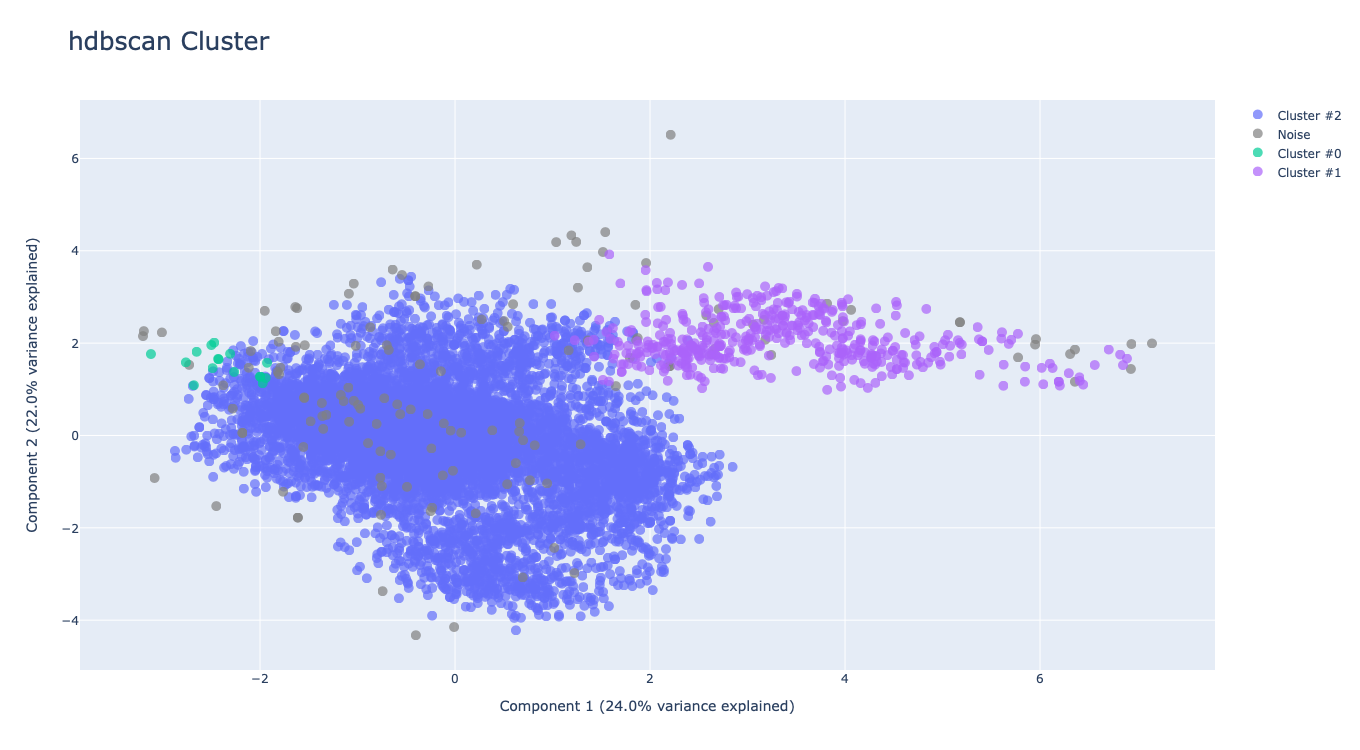

None

Cluster Widget using hdbscan

In [93]:
hdbscan_cluster

In [94]:
hdb = hdbscan_cluster.viz_data["clusters"]
hdb

0       2
1       2
2       2
3       2
4       2
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: clusters, Length: 10000, dtype: int64

In [95]:
hdbscan_cluster.viz_data["clusters"].value_counts()

 2    9376
 1     471
-1     137
 0      16
Name: clusters, dtype: int64

In [53]:
hdbscan_anomalies = hdbscan_cluster.viz_data[hdbscan_cluster.viz_data["clusters"]==-1]

In [54]:
hdbscan_anomalies

x         y  clusters
2350 -1.482306  0.303989        -1
2351 -1.366124  0.702367        -1
2352 -1.093468  1.038654        -1
2410 -0.700193  1.953556        -1
2443  0.222167  3.700080        -1
...        ...       ...       ...
9855  1.792779  1.682924        -1
9880  3.168776  2.504307        -1
9889  0.539241  2.354145        -1
9922  1.164412  1.841202        -1
9971  1.649644  1.069448        -1

[137 rows x 3 columns]

In [55]:
# hdbs = df_subset[hdbscan_cluster.viz_data[hdbscan_cluster.viz_data["clusters"]==-1].index]
# df_broken[df_broken.index.isin(isolation_anomalies.index)]
subset_anoms = df_broken_subset[df_broken_subset.index.isin(hdbscan_anomalies.index)]

In [79]:
if_a = if_anomalies[if_anomalies.index<10001]
if_a

sensor_00  sensor_02  sensor_04  sensor_06  sensor_10  sensor_11  \
2431   2.341435  52.994789   632.8704   13.14381   36.01515   57.30668   
2432   2.342419  52.994790   616.8981   13.12211   35.47522   56.96770   
2433   2.363079  52.951390   618.7500   13.05700   35.46587   56.89870   
2434   2.338484  52.994790   627.4305   13.15828   34.78529   56.64501   
2435   2.343403  52.994790   619.3287   13.15828   34.68674   56.71196   
2436   2.367014  53.038190   619.6759   12.98466   35.01924   56.40347   
2437   2.336516  52.994790   622.3380   13.09317   34.65677   56.20327   
2438   2.343403  52.994789   629.1666   13.12211   35.02333   56.46081   
2439   2.363079  52.994789   631.4814   13.14381   36.77039   56.77803   
2440   2.336516  52.994790   621.7593   13.14381   37.51889   56.66721   
2443   2.337500  52.994790   617.2048   13.09317   41.14659   56.60341   
2448   2.362095  53.038190   624.4213   13.06424   37.44920   58.43983   
2449   2.333565  52.994790   634.6064   13.08594   37.65961   57.92907   
2450   2.350289  52.994789   628.3564   13.02807   37.56021   57.39854   
2451   2.363079  52.994789   617.8241   13.02807   36.98037   56.54853   
2452   2.336516  52.994789   622.8009   13.02807   37.14513   56.83846   
2725   2.380787  42.838540   634.0278   13.23061   38.81666   52.69731   
9536   2.292245  50.000000   606.2500   12.86892   32.48629   37.09736   

      sensor_50  
2431   288.4838  
2432   287.6158  
2433   286.1690  
2434   289.6412  
2435   290.7986  
2436   282.6967  
2437   272.5695  
2438   268.8079  
2439   267.6505  
2440   270.2546  
2443   299.7685  
2448   297.1643  
2449   295.1389  
2450   291.3773  
2451   286.7477  
2452   281.2500  
2725   296.8750  
9536   133.6806

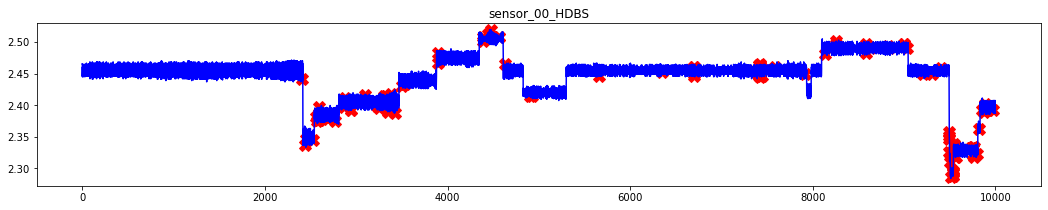

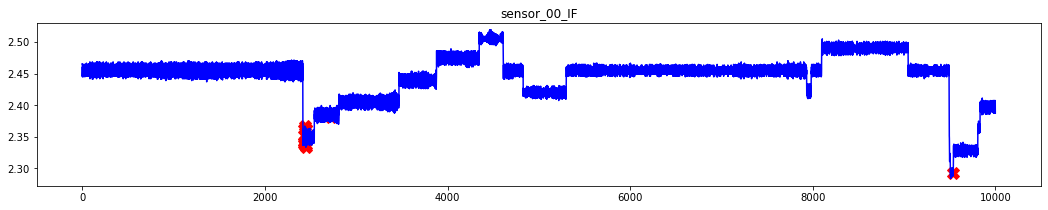

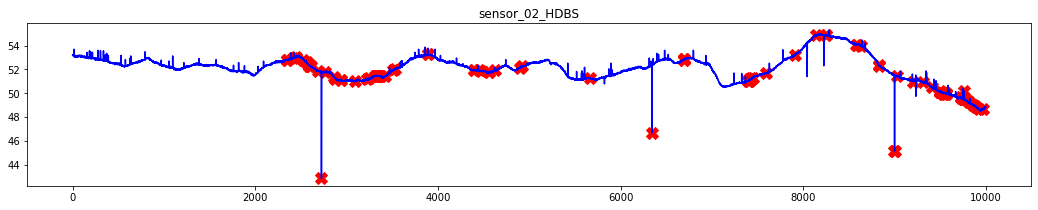

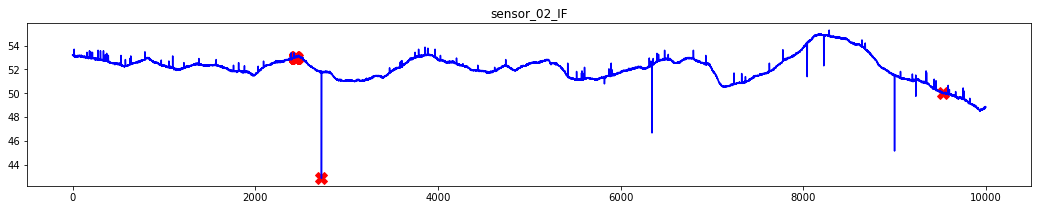

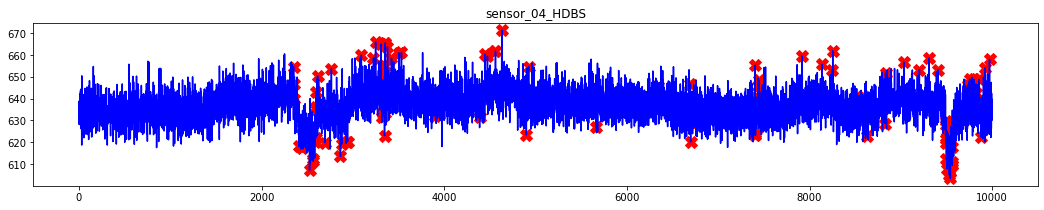

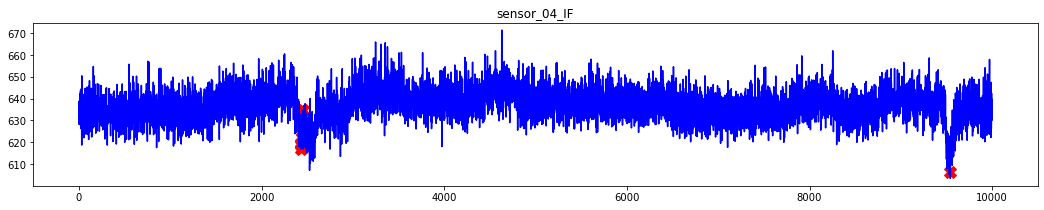

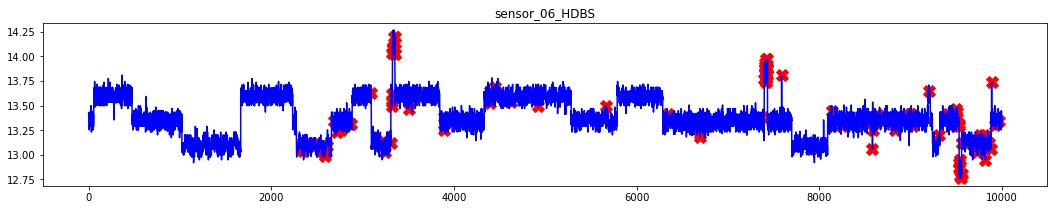

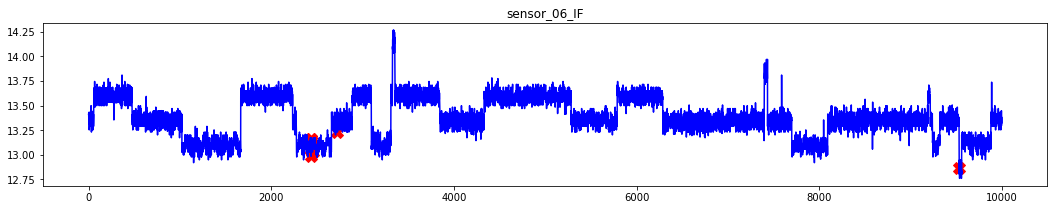

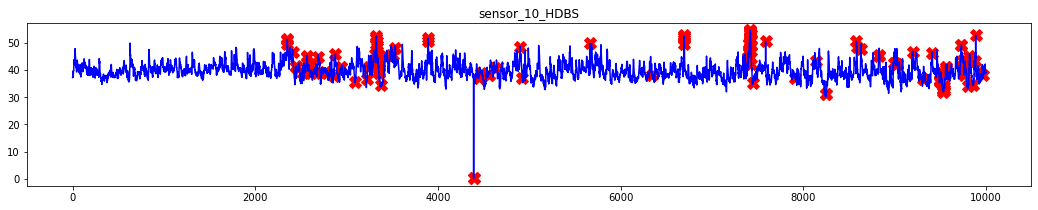

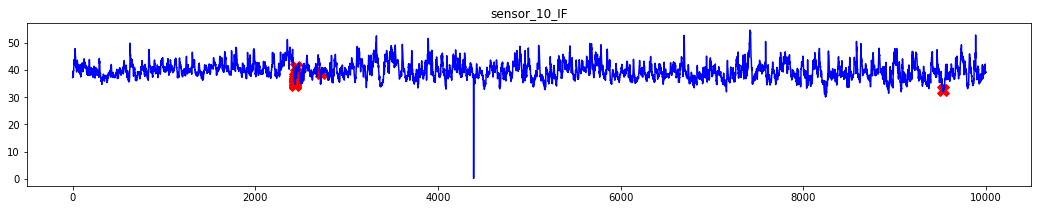

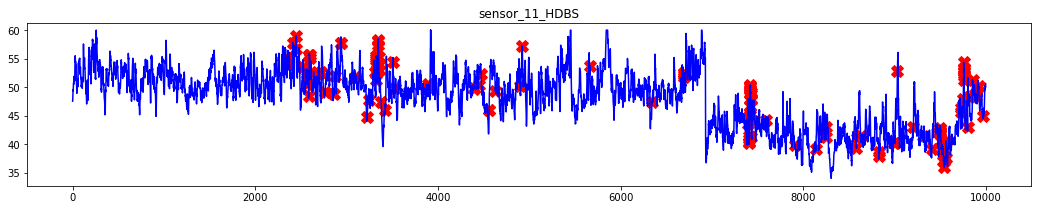

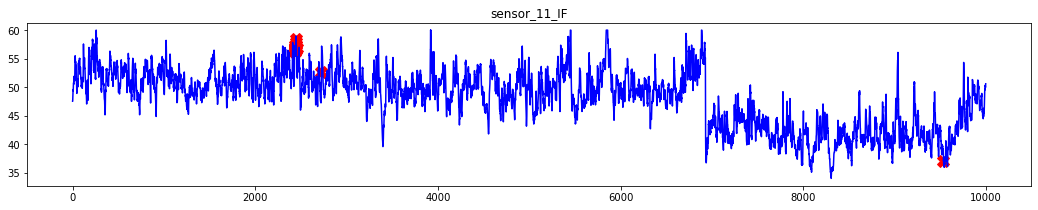

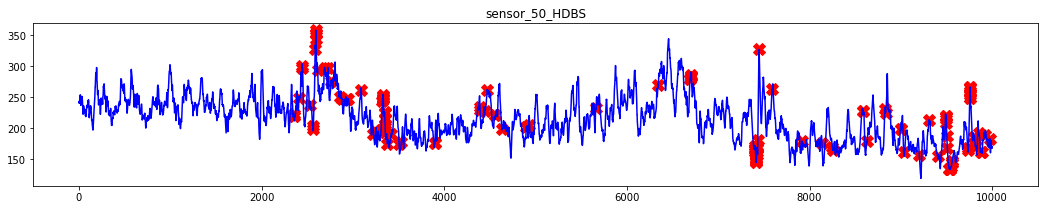

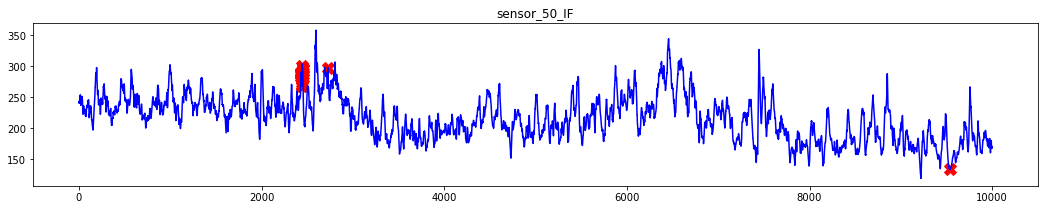

In [86]:
for name in selected_columns:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(subset_anoms[name], linestyle='none', marker='X', color='red', markersize=12) #anomalies
    _ = plt.plot(df_broken_subset[name], color='blue') #actuals
    _ = plt.title(name +"_HDBS")
    
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(if_a[name], linestyle='none', marker='X', color='red', markersize=12) #anomalies
    _ = plt.plot(df_broken_subset[name], color='blue') #actuals
    _ = plt.title(name +"_IF")
    plt.show()